# Sheet 2

# 1. Business Understanding
## 1.1 Obiettivo:
Comprendere le abitudini di spesa delle famiglie italiane e come queste siano cambiate nel periodo 2018-2021, analizzando l'impatto di eventi macroeconomici sui diversi territori e sulle diverse famiglie.
## 1.2 Domande Chiave:
- Quali categorie di spesa sono piú resilienti?
- Come cambiano le abitudini da territorio a territorio?
- É possibile prevedere la tendenza delle famiglie a modificare la propria spesa?

# 2. Comprensione dei Dati
## 2.1 Raccolta Dati
Vengono utilizzati due dataset Istat, Cambiamenti e Ampiezza.

In [565]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Caricamento iniziale per l'esplorazione
try:
    df_cambiamenti_orig = pd.read_csv('Cambiamenti nelle abitudini di spesa (2018-2021) (IT1,31_739_DF_DCCV_SPEMEFAM_1,1.0).csv', sep=';')
    df_ampiezza_orig = pd.read_csv('Ampiezza della famiglia (IT1,31_739_DF_DCCV_SPEMEFAM_3,1.0).csv', sep=';')
    print("File CSV caricati per l'esplorazione iniziale.")
except FileNotFoundError:
    print("Errore: File non trovati.")
    exit()

ERROR: Could not find a version that satisfies the requirement LabelEncoder (from versions: none)
ERROR: No matching distribution found for LabelEncoder


ModuleNotFoundError: ModuleNotFoundError: No module named 'LabelEncoder'

In [532]:
# Esplorazione base
print("\n--- Informazioni sul file 'Cambiamenti' ---")
print(df_cambiamenti_orig.info())


--- Informazioni sul file 'Cambiamenti' ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FREQ                        1008 non-null   object 
 1   Frequenza                   1008 non-null   object 
 2   REF_AREA                    1008 non-null   object 
 3   Territorio                  1008 non-null   object 
 4   DATA_TYPE                   1008 non-null   object 
 5   Indicatore                  1008 non-null   object 
 6   COICOP_CATEG                1008 non-null   object 
 7   Gruppo di spesa             1008 non-null   object 
 8   PURCH_BEHAVIOUR             1008 non-null   object 
 9   Abitudine di spesa          1008 non-null   object 
 10  Tempo (TIME_PERIOD)         1008 non-null   int64  
 11  Osservazione                1008 non-null   object 
 12  OBS_STATUS                  135 non-null    f

### Commento:
fjauifuidauihfa

In [533]:
print("\nValori unici in 'Territorio':", df_cambiamenti_orig['Territorio'].unique())
print("Valori unici in 'COICOP_CATEG':", df_cambiamenti_orig['COICOP_CATEG'].unique())


Valori unici in 'Territorio': ['Italia' 'Nord-ovest' 'Nord-est' 'Centro' 'Sud' 'Isole']
Valori unici in 'COICOP_CATEG': ['FOOD' 'BEVER' 'CLOT_FOOTW' 'PCARE_HY' 'MEX_RPC' 'FUEL_PT' 'TRV_HOL']


In [534]:
print("\n--- Informazioni sul file 'Ampiezza' ---")
print(df_ampiezza_orig.info())


--- Informazioni sul file 'Ampiezza' ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24275 entries, 0 to 24274
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   FREQ                                 24275 non-null  object 
 1   Frequenza                            24275 non-null  object 
 2   REF_AREA                             24275 non-null  object 
 3   Territorio                           24275 non-null  object 
 4   DATA_TYPE                            24275 non-null  object 
 5   Indicatore                           24275 non-null  object 
 6   COICOP                               24275 non-null  object 
 7   Coicop (DESC)                        24275 non-null  object 
 8   NUMBER_HOUSEHOLD_COMP                24275 non-null  object 
 9   Numero di componenti della famiglia  24275 non-null  object 
 10  Tempo (TIME_PERIOD)                  24275 non-null 

### Commento:
dsadasdsada

In [535]:
print("\nNumero di categorie COICOP uniche:", df_ampiezza_orig['COICOP'].nunique())
print("\nValori unici in COICOP:", df_ampiezza_orig['COICOP'].unique())


Numero di categorie COICOP uniche: 175

Valori unici in COICOP: ['01' '011' '0111' '0112' '0113' '0114' '0115' '0116' '0117' '0118' '0119'
 '012' '0121' '0122' 'NON_FOOD' '02' '021' '0211' '0212' '0213' '022'
 '0220' '03' '031' '0311' '0312' '0313' '0314' '032' '0321' '0322' '04'
 '041' '0411' '0412' '042' '0421' '0422' '043' '0431' '0432' '044' '0441'
 '0442' '0443' '0444' '045' '0451' '0452' '0453' '0454' '0455'
 '046_MANUT_STR' '0461_MANUT_STR' '05' '051' '0511' '0512' '0513' '052'
 '0520' '053' '0531' '0532' '0533' '054' '0540' '055' '0551' '0552' '056'
 '0561' '0562' '06' '061' '0611' '0612' '0613' '062' '0621' '0622' '0623'
 '063' '0630' '07' '071' '0711' '0712' '0713' '0714' '072' '0721' '0722'
 '0723' '0724' '073' '0731' '0732' '0733' '0734' '0735' '0736' '08' '081'
 '0810' '082' '0820' '083' '0830' '09' '091' '0911' '0912' '0913' '0914'
 '0915' '092' '0921' '0922' '0923' '093' '0931' '0932' '0933' '0934'
 '0935' '094' '0941' '0942' '0943' '095' '0951' '0952' '0953' '0954' '09

# 3. Preparazione dei Dati
Creare un unico DataFrame pulito e arricchito, pronto per l'analisi e la modellazione.
## 3.1 Pulizia di `df_cambiamenti`
*Prepariamo la tabella dei cambiamenti per l'analisi e l'unione.*

In [536]:
df_cambiamenti = df_cambiamenti_orig.copy()
df_cambiamenti = df_cambiamenti[df_cambiamenti['Abitudine di spesa'] != 'Tutte le voci'].copy()
# Rinomina esplicita per chiarezza e per evitare conflitti
df_cambiamenti = df_cambiamenti.rename(columns={
    'REF_AREA': 'Macroregione_Cod',
    'Territorio': 'Macroregione_Nome', 
    'COICOP_CATEG': 'Gruppo_spesa_cod',
    'Tempo (TIME_PERIOD)': 'Anno',
    'Osservazione': 'PercentualeFamiglie'
})
df_cambiamenti['PercentualeFamiglie'] = pd.to_numeric(df_cambiamenti['PercentualeFamiglie'].replace('..', '0'), errors='coerce')
# Selezioniamo solo le colonne che ci servono
df_cambiamenti_clean = df_cambiamenti[['Macroregione_Cod', 'Macroregione_Nome', 'Gruppo_spesa_cod', 'Abitudine di spesa', 'Anno', 'PercentualeFamiglie']]
print("DataFrame 'Cambiamenti' pulito e preparato.")

DataFrame 'Cambiamenti' pulito e preparato.


**Modifiche effettuate:**
1. Copia del DataFrame per non modificare mai i dati originali caricati. In questo modo, se commettiamo un errore, possiamo sempre ripartire dal DataFrame
2. Rimozione di Record con "Tutte le voci" dalla Colonna "Abitudini di spesa" in quanto sono dati ridondanti e derivati dalla somma delle altre cinque opzioni.
3. Rinomina delle Colonne
4. Sostituzione di Record da ".." a 0 dalla Colonna "PercentualeFamiglie" in quanto indicano dati che non raggiungono la soglia minima di affidabilitá statistica, avendo una percentuale troppo bassa.
5. Rimozione di Colonne Ridondanti (Es. "Copicop Categ", "Gruppo di Spesa" teniamo solo "Coicop Categ")

## 3.2 Pulizia di `df_ampiezza`
*Prepariamo la tabella delle abitudini per l'analisi e l'unione.*

In [537]:
df_ampiezza = df_ampiezza_orig.copy()
df_ampiezza = df_ampiezza.rename(columns={
    'REF_AREA': 'Regione_Cod',
    'Territorio': 'Regione_Nome',
    'Tempo (TIME_PERIOD)': 'Anno',
    'Osservazione': 'SpesaMedia_Micro'
})
df_ampiezza['SpesaMedia_Micro'] = pd.to_numeric(df_ampiezza['SpesaMedia_Micro'], errors='coerce')
df_ampiezza.dropna(subset=['SpesaMedia_Micro'], inplace=True)
print("DataFrame 'Ampiezza' pulito e preparato.")

DataFrame 'Ampiezza' pulito e preparato.


**Modifiche Effettutate:**
1. Copia del DataFrame per non modificare mai i dati originali caricati. In questo modo, se commettiamo un errore, possiamo sempre ripartire dal DataFrame
2. Rinomina delle Colonne
3. Conversione della Colonna "Spesa Media Micro" in tipo Numerico.
4. Rimozione eventuali valori mancanti nella Colonna "SpesaMedia Micro"

## 3.3 Mappatura
*Creiamo delle colonne "ponte" in `df_ampiezza` per renderlo compatibile con `df_cambiamenti`.*

In [538]:
mappa_categorie = {
    'FOOD': '01', 'BEVER': '02', 'CLOT_FOOTW': '03', 'PCARE_HY': '12',
    'MEX_RPC': '06', 'FUEL_PT': '07', 'TRV_HOL': '09'
}
mappa_inversa_coicop = {v: k for k, v in mappa_categorie.items()}

df_ampiezza['Macroregione_Cod'] = df_ampiezza['Regione_Cod'].str.slice(0, 3)
df_ampiezza['COICOP_agg'] = df_ampiezza['COICOP'].astype(str).str.slice(0, 2)
df_ampiezza['Gruppo_spesa_cod'] = df_ampiezza['COICOP_agg'].map(mappa_inversa_coicop)
df_spesa_mappato = df_ampiezza.dropna(subset=['Gruppo_spesa_cod']).copy()
print("Mappatura eseguita con successo")

Mappatura eseguita con successo


**Modifiche Effettuate:**
1. Mappatura delle categorie associando le 7 macro-categorie di spesa ai codici COICOP aggregati. (solo i primi 2 caratteri)
2. Creazione della Colonna "Gruppo_Spesa_Cod" applicandoci la mappa per tradurre i codici COICOP nella macro-categoria corrispondente.
3. Creazione della Colonna "MacroRegione Cod" estraendo i primi 3 caratteri del Cod. Regionale e ottenendo cosí il codice della Macro Regione.
4. Creazone di un nuovo DataFrame `df_spesa_mappato`, che contiene solo le righe di df_ampiezza per le quali è stato possibile trovare una corrispondenza nelle nostre 7 categorie di interesse.

### 3.4 Aggregazione per Macro Regione

In [539]:
colonne_spesa_da_unire = [
    'Macroregione_Cod', 'Anno', 'Gruppo_spesa_cod', 'Regione_Cod', 'Regione_Nome',
    'COICOP', 'Coicop (DESC)', 'Numero di componenti della famiglia', 'SpesaMedia_Micro'
]

df_finale_dettagliato = pd.merge(
    df_cambiamenti_clean,
    df_spesa_mappato[colonne_spesa_da_unire],
    on=['Macroregione_Cod', 'Anno', 'Gruppo_spesa_cod'],
    how='inner'
)
print(f"Tabella finale dettagliata creata! Numero di righe: {len(df_finale_dettagliato)}")

Tabella finale dettagliata creata! Numero di righe: 30310


**Modifiche Effettuate:**
1. Unione dei due DataFrame abbinando i Record che hanno gli stessi valori nelle Colonne "MacroRegione Cod", "Anno", "Gruppo Spesa Cod".
2. Utilizziamo `inner join` per garantire che nel risultato finale siano presenti solo le combinazioni Anno/Territorio/Categoria per cui esistono dati validi in entrambi i file originali.

### 3.5 Integrazione Dati

In [540]:
df_finale_dettagliato['SpesaMedia_Macro'] = df_finale_dettagliato.groupby(
    ['Macroregione_Cod', 'Anno', 'Gruppo_spesa_cod']
)['SpesaMedia_Micro'].transform('mean').round(2)
print("Aggiunta la colonna 'SpesaMedia_Macro' alla tabella finale.")

Aggiunta la colonna 'SpesaMedia_Macro' alla tabella finale.


**Modifiche Effettuate:**
1. Creazione di una nuova Colonna "Spesa Media Macro" che, per ogni riga, contiene la spesa media calcolata a livello di macro-regione.

### 3.6 Pulizia Finale

In [541]:
colonne_originali_da_tenere = [
    'Macroregione_Nome',
    'Regione_Nome',
    'Anno',
    'Gruppo_spesa_cod',
    'Coicop (DESC)',
    'Abitudine di spesa',
    'PercentualeFamiglie',
    'Numero di componenti della famiglia',
    'SpesaMedia_Macro',
    'SpesaMedia_Micro'
]

column_renames = {
    'Macroregione_Nome': 'Macro Regione',
    'Regione_Nome': 'Regione',
    'Gruppo_spesa_cod': 'Macro Gruppo Spesa',
    'SpesaMedia_Micro': 'Micro Spesa Media',
    'Abitudine di spesa': 'Abitudine Spesa',
    'PercentualeFamiglie': 'Percentuale Famiglie',
    'Numero di componenti della famiglia': 'Numero Componenti Famiglia',
    'SpesaMedia_Macro': 'Macro Spesa Media',
    'Coicop (DESC)': 'Micro Gruppo Spesa',
}

df_finale = df_finale_dettagliato[colonne_originali_da_tenere].rename(columns=column_renames)
df_finale.info()
print("Tabella finale pronta.")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30310 entries, 0 to 30309
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Macro Regione               30310 non-null  object 
 1   Regione                     30310 non-null  object 
 2   Anno                        30310 non-null  int64  
 3   Macro Gruppo Spesa          30310 non-null  object 
 4   Micro Gruppo Spesa          30310 non-null  object 
 5   Abitudine Spesa             30310 non-null  object 
 6   Percentuale Famiglie        30310 non-null  float64
 7   Numero Componenti Famiglia  30310 non-null  object 
 8   Macro Spesa Media           30310 non-null  float64
 9   Micro Spesa Media           30310 non-null  float64
dtypes: float64(3), int64(1), object(6)
memory usage: 2.5+ MB
Tabella finale pronta.


**Modifiche Effettuate:**
1. Selezioniamo solo le Colonne desiderate per la tabella finale.

In [542]:
df_finale

,Macro Regione,Regione,Anno,Macro Gruppo Spesa,Micro Gruppo Spesa,Abitudine Spesa,Percentuale Famiglie,Numero Componenti Famiglia,Macro Spesa Media,Micro Spesa Media
0,Italia,Italia,2018,FOOD,-- prodotti alimentari e bevande analcoliche,Un anno fa li compravo e continuo a comprarli ...,65.6,1,113.28,285.38
1,Italia,Italia,2018,FOOD,-- prodotti alimentari e bevande analcoliche,Un anno fa li compravo e continuo a comprarli ...,65.6,2,113.28,473.24
2,Italia,Italia,2018,FOOD,-- prodotti alimentari e bevande analcoliche,Un anno fa li compravo e continuo a comprarli ...,65.6,3,113.28,553.82
3,Italia,Italia,2018,FOOD,-- prodotti alimentari e bevande analcoliche,Un anno fa li compravo e continuo a comprarli ...,65.6,4,113.28,632.19
4,Italia,Italia,2018,FOOD,-- prodotti alimentari e bevande analcoliche,Un anno fa li compravo e continuo a comprarli ...,65.6,5 e più,113.28,698.70
...,...,...,...,...,...,...,...,...,...,...
30305,Isole,Sardegna,2021,TRV_HOL,"-- ricreazione, spettacoli e cultura",Un anno fa non li compravo e continuo a non co...,59.5,1,88.53,43.35
30306,Isole,Sardegna,2021,TRV_HOL,"-- ricreazione, spettacoli e cultura",Un anno fa non li compravo e continuo a non co...,59.5,2,88.53,68.55
30307,Isole,Sardegna,2021,TRV_HOL,"-- ricreazione, spettacoli e cultura",Un anno fa non li compravo e continuo a non co...,59.5,3,88.53,95.77
30308,Isole,Sardegna,2021,TRV_HOL,"-- ricreazione, spettacoli e cultura",Un anno fa non li compravo e continuo a non co...,59.5,4,88.53,178.65


# ============ FASE 1 ============

# 4. Analisi Esplorativa dei Dati

In [543]:
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 7)

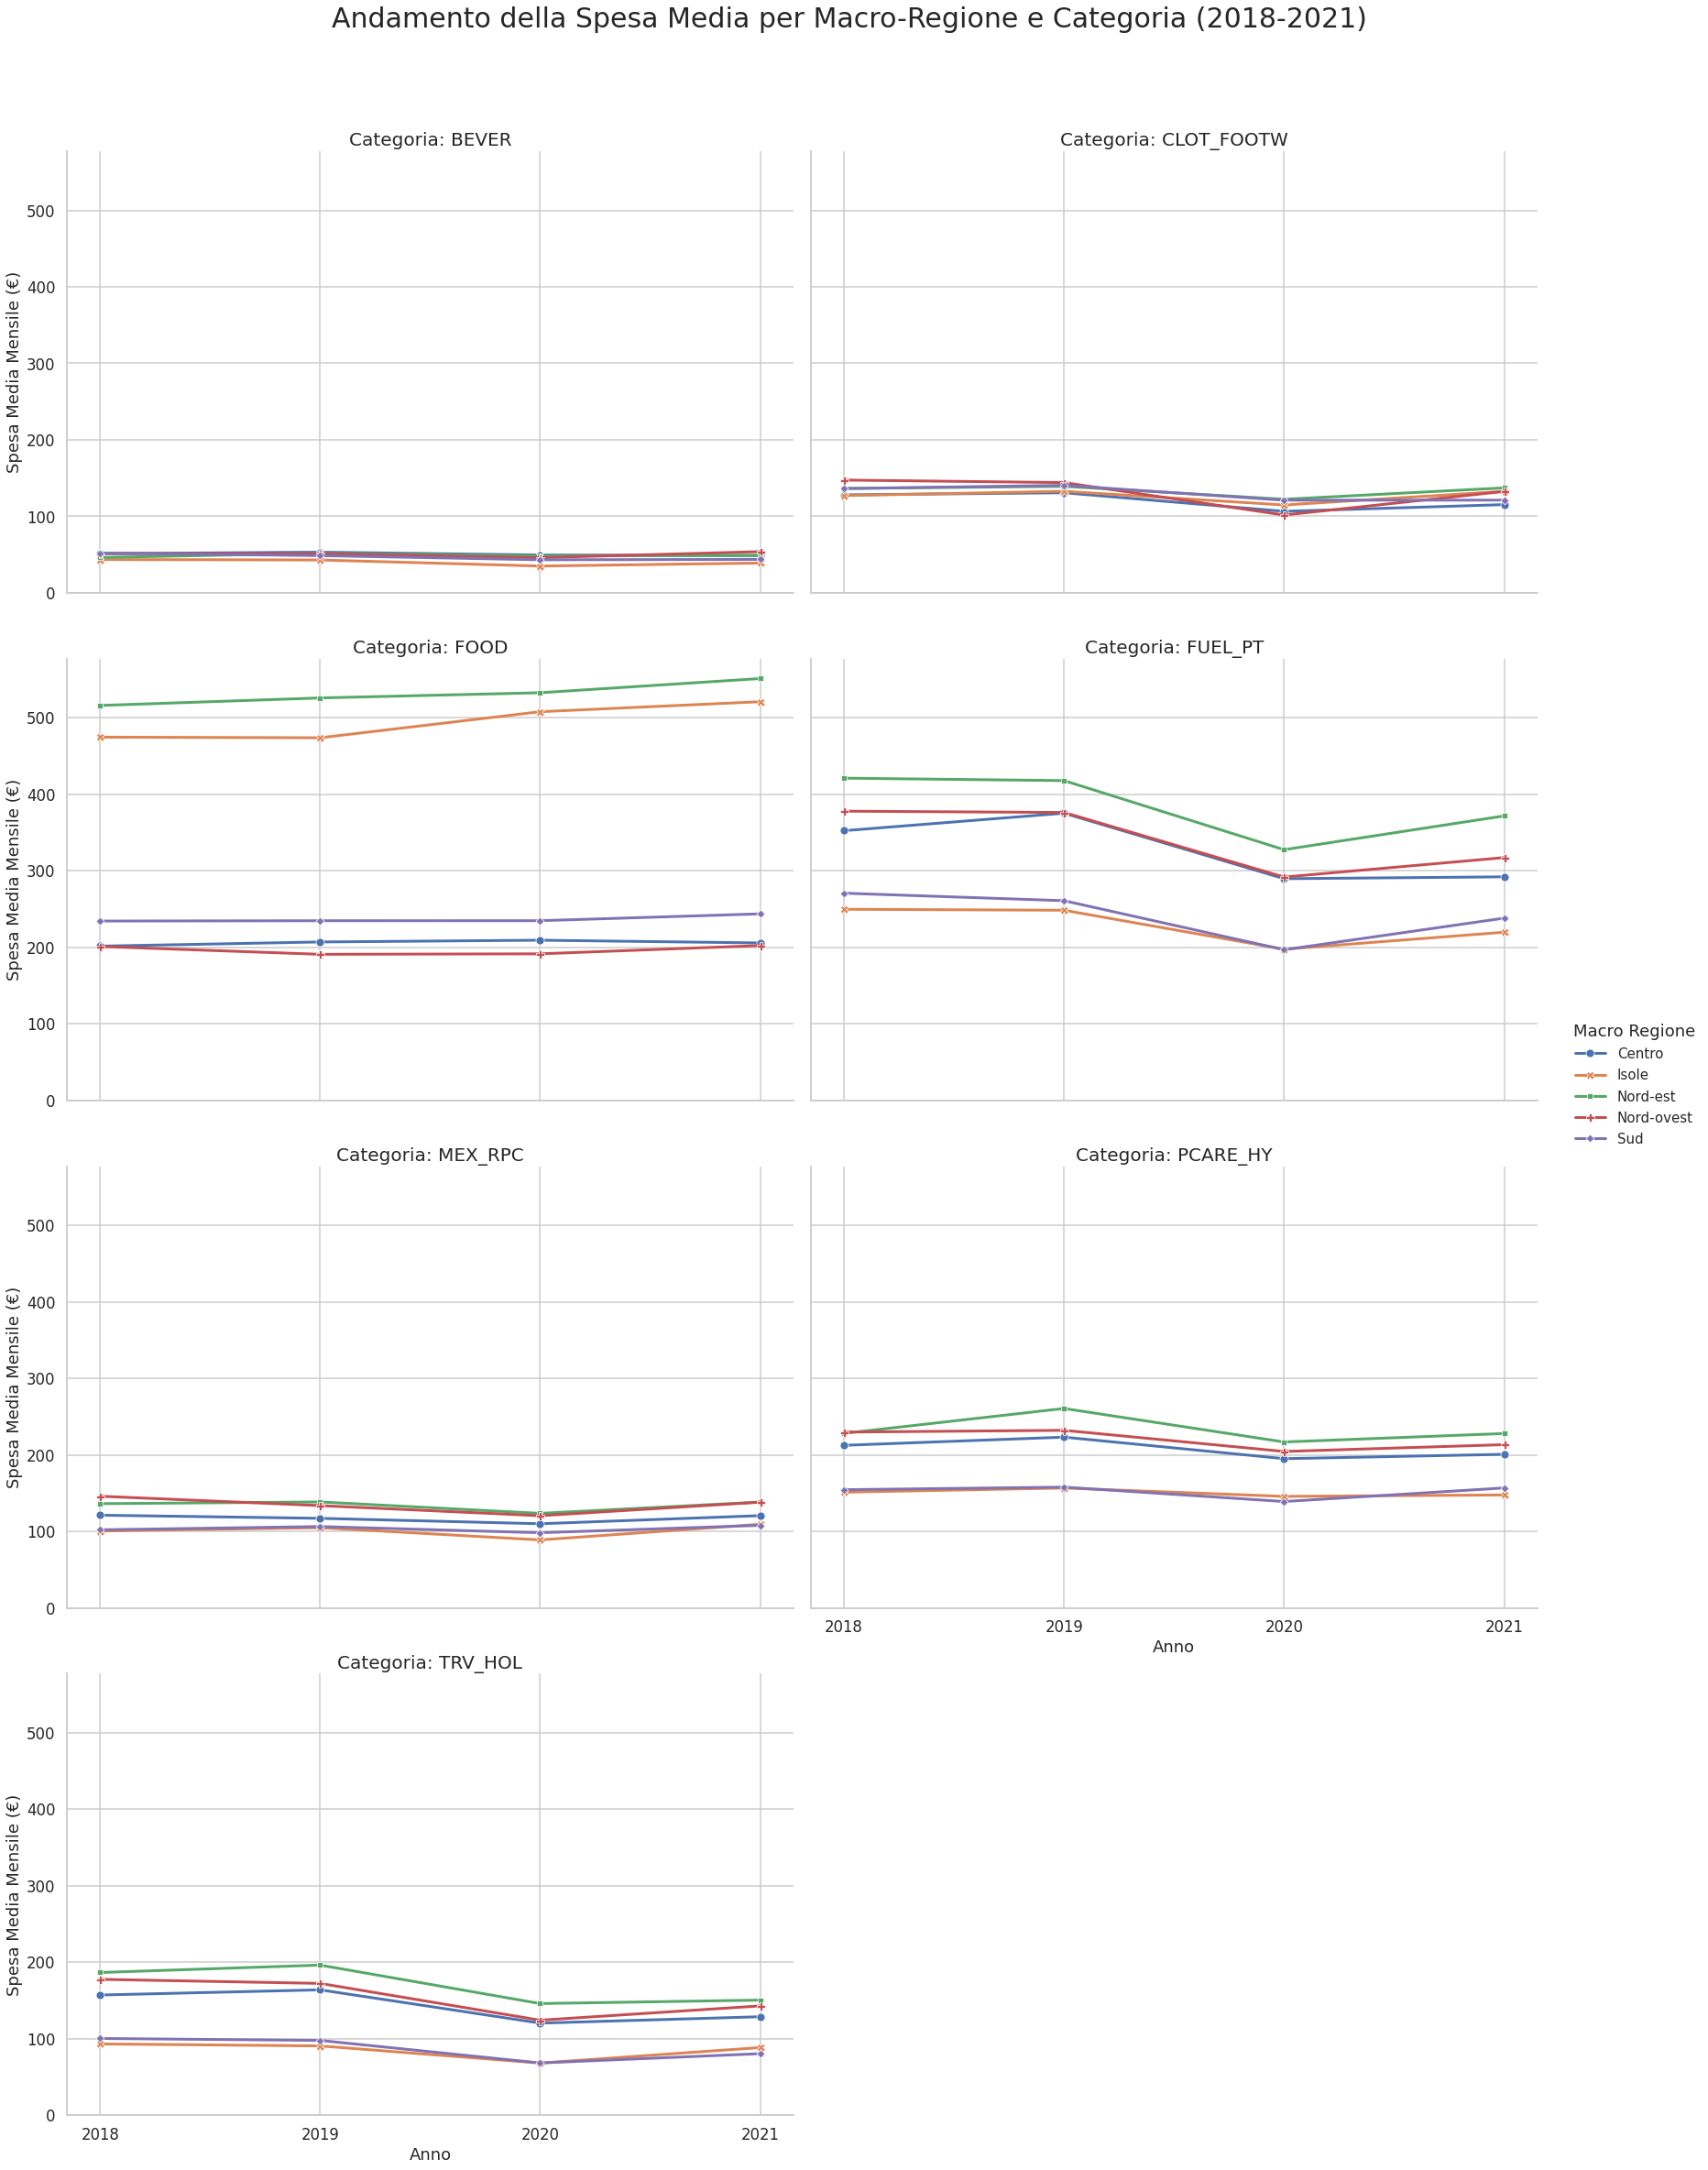

In [544]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- PREREQUISITO ---
# Assicurati di avere il DataFrame 'df_finale' già creato e pulito.
# ...

# --- PREPARAZIONE DEI DATI PER IL GRAFICO ---
df_confronto_macro = df_finale[df_finale['Macro Regione'] != 'Italia'].copy()
df_plot = df_confronto_macro.groupby(
    ['Macro Regione', 'Anno', 'Macro Gruppo Spesa']
)['Macro Spesa Media'].mean().reset_index()


# --- CREAZIONE DEL GRAFICO A GRIGLIA ---

# 1. Imposta il contesto di plotting
sns.set_context("talk") 

# 2. Creiamo la griglia
g = sns.FacetGrid(
    df_plot, 
    col='Macro Gruppo Spesa', 
    col_wrap=2,
    height=8,
    aspect=1.5,
)

# 3. Mappiamo il grafico
g.map_dataframe(
    sns.lineplot, 
    x='Anno', 
    y='Macro Spesa Media', 
    hue='Macro Regione', 
    style='Macro Regione', 
    markers=True, 
    dashes=False,
    linewidth=3
)

# 4. Liberiamo le scale degli assi Y
g.set(ylim=(0, None), xticks=[2018, 2019, 2020, 2021])
g.fig.canvas.draw()

# 5. Miglioriamo l'aspetto finale
g.set_axis_labels("Anno", "Spesa Media Mensile (€)")
g.set_titles("Categoria: {col_name}", size=20)
g.fig.suptitle('Andamento della Spesa Media per Macro-Regione e Categoria (2018-2021)', fontsize=30, y=1.03)


# ---- BLOCCO DI CORREZIONE PER LA LEGENDA ----
# 6. Aggiungiamo la legenda senza i parametri di stile non supportati
g.add_legend(title='Macro Regione')

# 7. Ora modifichiamo le proprietà della legenda dopo averla creata
#    Accediamo all'oggetto legenda tramite g._legend
if g._legend is not None:
    plt.setp(g._legend.get_title(), fontsize=18) # Imposta la dimensione del titolo della legenda
    for text in g._legend.get_texts():
        text.set_fontsize(15) # Imposta la dimensione del testo per ogni elemento della legenda
# -----------------------------------------------

g.tight_layout()

# Mostra il grafico
plt.show()

# Ripristina il contesto di default
sns.set_context("notebook")

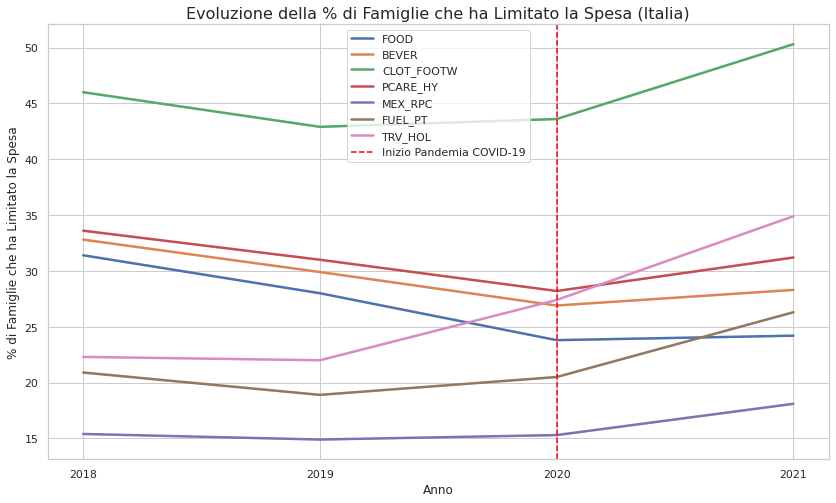

In [545]:
df_limitata = df_finale[
    (df_finale['Abitudine Spesa'] == 'Un anno fa li compravo e ho limitato la spesa in quantità e/o qualità') &
    (df_finale['Macro Regione'] == 'Italia')
]
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_limitata, x='Anno', y='Percentuale Famiglie', hue='Macro Gruppo Spesa', lw=2.5)
plt.title('Evoluzione della % di Famiglie che ha Limitato la Spesa (Italia)', fontsize=16)
plt.xlabel('Anno')
plt.ylabel('% di Famiglie che ha Limitato la Spesa')
plt.axvline(2020, color='red', linestyle='--', label='Inizio Pandemia COVID-19')
plt.legend()
plt.xticks([2018, 2019, 2020, 2021])
plt.show()

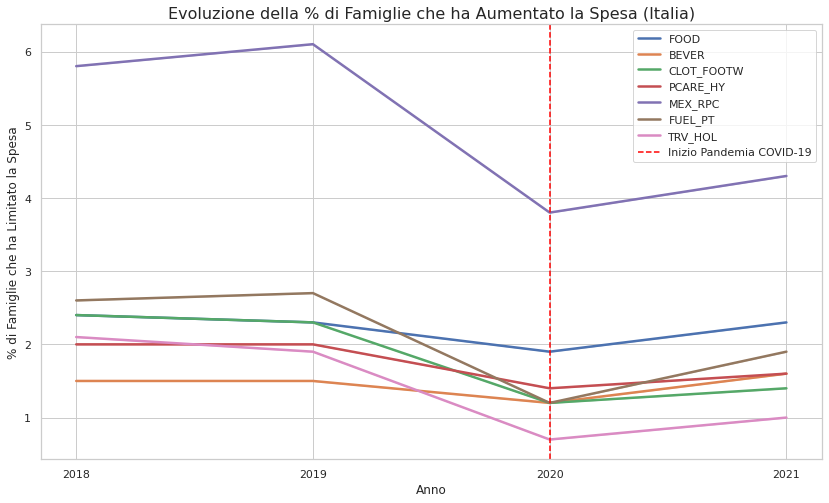

In [546]:
df_limitata = df_finale[
    (df_finale['Abitudine Spesa'] == 'Un anno fa li compravo e ho aumentato la spesa in quantità e/o qualità') &
    (df_finale['Macro Regione'] == 'Italia')
]
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_limitata, x='Anno', y='Percentuale Famiglie', hue='Macro Gruppo Spesa', lw=2.5)
plt.title('Evoluzione della % di Famiglie che ha Aumentato la Spesa (Italia)', fontsize=16)
plt.xlabel('Anno')
plt.ylabel('% di Famiglie che ha Limitato la Spesa')
plt.axvline(2020, color='red', linestyle='--', label='Inizio Pandemia COVID-19')
plt.legend()
plt.xticks([2018, 2019, 2020, 2021])
plt.show()

## Mappa del Costo della Vita Regionale (Spesa Pro Capite)
Quali sono le regioni italiane dove il costo della vita, misurato come Spasa media pro capite per i bent essential, è più alto?

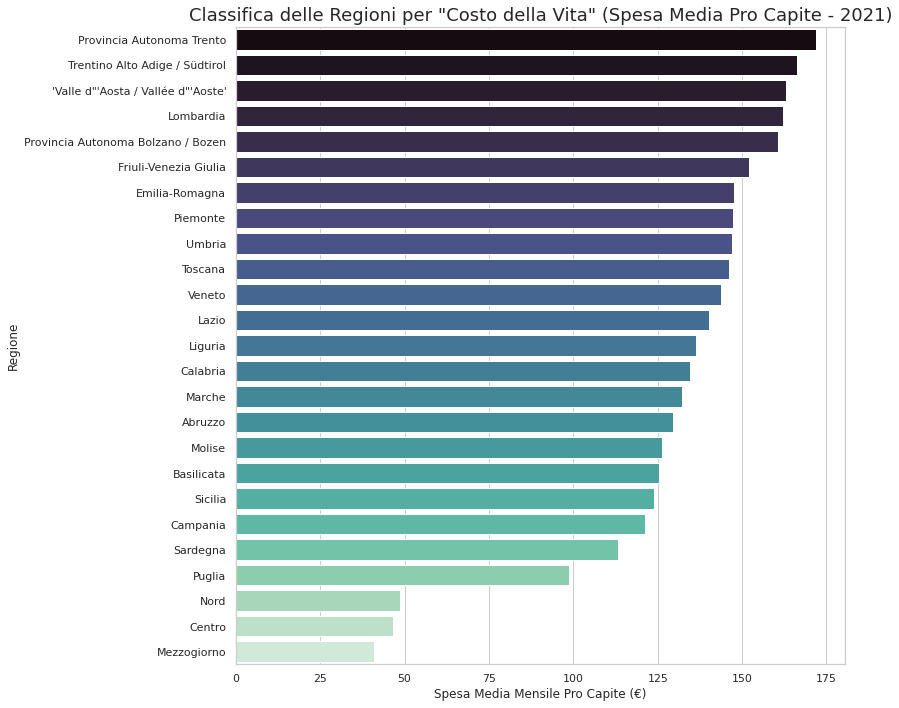

In [547]:
df_finale['Numero Componenti Famiglia'] = pd.to_numeric(df_finale['Numero Componenti Famiglia'], errors='coerce')
df_finale['Spesa Pro Capite'] = (df_finale['Micro Spesa Media'] / df_finale['Numero Componenti Famiglia']).round(2)
    
# Filtriamo per il 2021 e categorie essenziali
df_costo_vita = df_finale[
    (df_finale['Anno'] == 2021) &
    (df_finale['Macro Gruppo Spesa'].isin(['FOOD', 'FUEL_PT', 'PCARE_HY'])) &
    (df_finale['Regione'] != 'Italia')
]

# Aggreghiamo per regione
classifica_regioni = df_costo_vita.groupby('Regione')['Spesa Pro Capite'].mean().sort_values(ascending=False)

# Creazione del grafico
plt.figure(figsize=(12, 10))
barplot = sns.barplot(x=classifica_regioni.values, y=classifica_regioni.index, palette="mako", hue=classifica_regioni.index, legend=False)
plt.title('Classifica delle Regioni per "Costo della Vita" (Spesa Media Pro Capite - 2021)', fontsize=18)
plt.xlabel('Spesa Media Mensile Pro Capite (€)')
plt.ylabel('Regione')
plt.tight_layout()
plt.show()

## 1. Descrizione Grafico
- Questo grafico classifica le regioni e le macro-aree italiane in base alla loro spesa media mensile pro capite nel 2021.
- La spesa è stata calcolata come media delle categorie considerate "essenziali" (FOOD, FUEL_PT, PCARE_HY). 
- Le barre sono ordinate in modo decrescente, dalla spesa più alta alla più bassa.
- Sull'asse y troviamo il nome della Regione o della Macro-Area
- Sull'asse x troviamo la misura della spesa media mensile pro capite in euro

## 2. Cosa capiamo da questi dati
- La top 5 è interamente occupata da province autonome e regioni dell'arco alpino: Provincia Autonoma di Trento è in testa con una spesa pro capite di circa 170€, seguita da Trentino Alto Adige, Valle d'Aosta, Lombardia e Provincia Autonoma di Bolzano. Queste aree mostrano un costo della vita più elevato rispetto al resto d'Italia.
- Divisione Nord-Centro-Sud: quasi tutte le regioni del Nord e alcune del Centro (come Umbria e Toscana) si posizionano nella metà superiore della classifica, le altre regioni si posizionano sotto. Il Mezzogiorno si posiziona all'ultimo posto con la spesa pro capite più bassa (sotto i 50€), confermando che il costo della vita percepito in quest'area è, in media, molto inferiore rispetto al Nord.

## 3. Interpretazione e Implicazioni di Business/Socio-economiche
- Le regioni con i redditi pro capite più alti (Lombardia, Trentino-Alto Adige) sono anche quelle dove la spesa per beni e servizi essenziali è maggiore. 
- Per un'azienda che vende prodotti di largo consumo, questa analisi è molto importante, suggerendo un rialzo dei prezzi dei propri prodotti nelle zone dove il potere d'acquisto e la spesa media sono maggiori, puntando sulla qualità dei prodotti, e inserire offerte speciali e prodotti scontati per le regioni in fondo alla classifica, puntando di piú sulla convenienza. La pubblicità degli stessi prodotti potrebbe quindi puntare di piu sulla qualità dei prodotti al nord, e sul risparmio e sul rapporto qualità-prezzo al sud.

## Impatto sui Beni Non Essenziali
Come ha reagito la spesa per beni voluttuari (Abbigliamento, Viaggi) rispetto a quella per beni essenziali (Cibo) durante il picco della crisi (2019 vs 2020)?

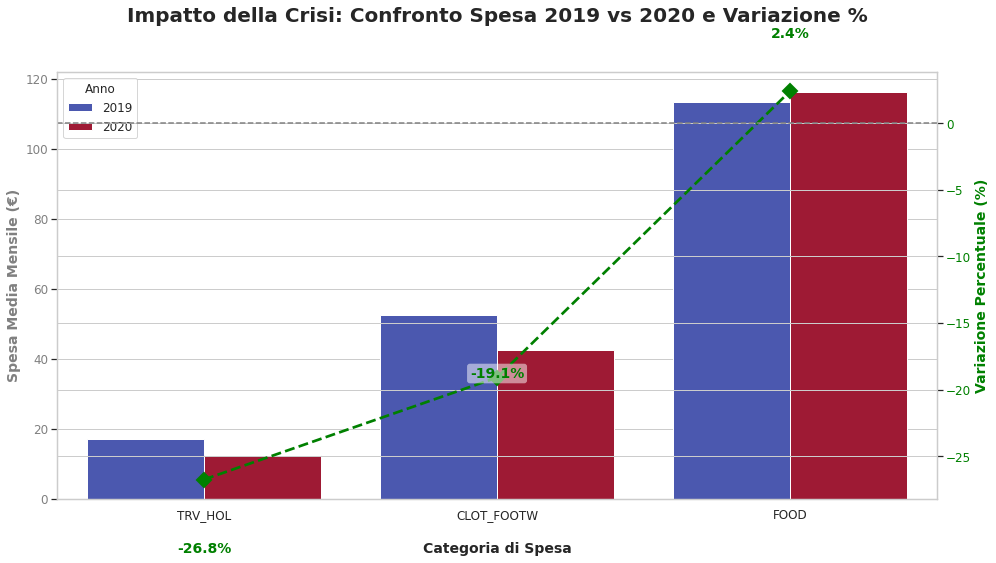

In [548]:
df_crisi = df_finale[
    (df_finale['Anno'].isin([2019, 2020])) &
    (df_finale['Macro Regione'] == 'Italia') &
    (df_finale['Macro Gruppo Spesa'].isin(['FOOD', 'CLOT_FOOTW', 'TRV_HOL']))
]

# --- 2. Calcolo della Variazione e Ordinamento (invariato) ---
df_pivot = df_crisi.pivot_table(
    index='Macro Gruppo Spesa',
    columns='Anno',
    values='Macro Spesa Media'
).reset_index()

df_pivot['Variazione %'] = ((df_pivot[2020] - df_pivot[2019]) / df_pivot[2019]) * 100
df_pivot = df_pivot.sort_values('Variazione %', ascending=True)
ordine_categorie = df_pivot['Macro Gruppo Spesa'].tolist()

df_plot_crisi = df_crisi.copy()
df_plot_crisi['Macro Gruppo Spesa'] = pd.Categorical(
    df_plot_crisi['Macro Gruppo Spesa'],
    categories=ordine_categorie,
    ordered=True
)

# --- 3. Creazione del Grafico (logica di posizionamento modificata) ---

fig, ax1 = plt.subplots(figsize=(14, 8))

sns.barplot(data=df_plot_crisi, x='Macro Gruppo Spesa', y='Macro Spesa Media', hue='Anno', palette='coolwarm', ax=ax1)

ax1.set_title(
    'Impatto della Crisi: Confronto Spesa 2019 vs 2020 e Variazione %', 
    fontsize=20, 
    weight='bold',
    pad=50
)
ax1.set_xlabel(
    'Categoria di Spesa', 
    fontsize=14, 
    weight='bold',
    labelpad=20
)
ax1.set_ylabel('Spesa Media Mensile (€)', fontsize=14, weight='bold', color='gray')
ax1.tick_params(axis='y', labelcolor='gray', labelsize=12)
ax1.tick_params(axis='x', labelsize=12)
ax1.legend(title='Anno', loc='upper left', fontsize=12)

ax2 = ax1.twinx()

sns.pointplot(
    data=df_pivot,
    x='Macro Gruppo Spesa',
    y='Variazione %',
    order=ordine_categorie,
    color='green',
    markers='D',
    markersize=10,
    linestyle='--',
    ax=ax2
)

ax2.set_ylabel('Variazione Percentuale (%)', fontsize=14, weight='bold', color='green')
ax2.tick_params(axis='y', labelcolor='green', labelsize=12)
ax2.axhline(0, color='grey', linestyle='--', lw=1.5)

# --- MODIFICA CHIAVE NEL CICLO ---
for i, categoria in enumerate(ordine_categorie):
    riga_dati = df_pivot[df_pivot['Macro Gruppo Spesa'] == categoria]
    variazione = riga_dati['Variazione %'].iloc[0]
    
    # Impostiamo un offset di default
    vertical_offset = 4 if variazione > 0 else -5.5
    
    # *** Aggiungiamo una condizione specifica per la categoria 'CLOT_FOOTW' ***
    if categoria == 'CLOT_FOOTW':
        vertical_offset = 0  # Spostiamo l'etichetta più in alto, vicino al punto
        
    ax2.text(
        x=i, 
        y=variazione + vertical_offset, 
        s=f"{variazione:.1f}%", 
        color='green',
        ha='center',
        size=14, 
        weight='bold',
        # Aggiungiamo un background per migliorare la leggibilità se si sovrappone
        bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', boxstyle='round,pad=0.2')
    )

fig.tight_layout()
plt.show()

Certamente. Analizzo in dettaglio il grafico che hai prodotto. È un'ottima visualizzazione che combina più informazioni in modo efficace.

### A. Descrizione Generale del Grafico

Il grafico è un **grafico combinato** (barre e linee) che utilizza un doppio asse Y. Il suo scopo è mostrare l'impatto della crisi del 2020 sulla spesa delle famiglie italiane per tre macro-categorie selezionate: Viaggi/Vacanze (`TRV_HOL`), Abbigliamento/Calzature (`CLOT_FOOTW`) e Cibo (`FOOD`).

*   **Asse X:** Categorie di Spesa.
*   **Asse Y Sinistro (in €):** Spesa Media Mensile. Le barre blu rappresentano la spesa del 2019 (pre-crisi), mentre le barre rosse rappresentano la spesa del 2020 (durante la crisi).
*   **Asse Y Destro (in %):** Variazione Percentuale. La linea verde tratteggiata con i rombi mostra la variazione percentuale della spesa dal 2019 al 2020 per ciascuna categoria.
*   **Legenda e Titolo:** Chiariscono l'anno di riferimento per le barre e l'obiettivo generale del grafico.

### B. Analisi Dettagliata per Categoria

Analizziamo ogni categoria per estrarre le informazioni principali.

**1. FOOD (Cibo)**
*   **Dati Assoluti (Barre):** Questa è la categoria con la spesa media mensile più alta in assoluto. La barra del 2019 si attesta intorno ai 113€, mentre quella del 2020 è leggermente più alta, circa 116€.
*   **Variazione Percentuale (Linea Verde):** Il punto verde è l'unico a trovarsi **sopra la linea dello zero**, e l'etichetta conferma una **crescita del +2.4%**.
*   **Interpretazione:** Nonostante la crisi economica, la spesa per il cibo non solo non è diminuita, ma è leggermente aumentata. Questo fenomeno è pienamente giustificato dai lockdown: con ristoranti, bar e mense chiusi o limitati, le famiglie hanno spostato i loro consumi alimentari quasi interamente sull'acquisto di prodotti da consumare a casa, cucinando di più.

**2. CLOT_FOOTW (Abbigliamento e Calzature)**
*   **Dati Assoluti (Barre):** La spesa media passa da circa 52€ nel 2019 a circa 42€ nel 2020. Il calo è visivamente netto.
*   **Variazione Percentuale (Linea Verde):** Il punto verde si posiziona nettamente sotto lo zero. L'etichetta ` -19.1%` quantifica questo crollo.
*   **Interpretazione:** Questa categoria, un bene semi-durevole e parzialmente discrezionale, ha subito un colpo significativo. Le cause sono molteplici: smart working, assenza di eventi sociali, chiusura dei negozi e incertezza economica hanno spinto le famiglie a posticipare o annullare acquisti non strettamente necessari.

**3. TRV_HOL (Viaggi e Vacanze)**
*   **Dati Assoluti (Barre):** Questa categoria ha la spesa media mensile più bassa tra le tre. La spesa crolla da circa 17€ nel 2019 a circa 12€ nel 2020. Anche se il calo in euro non è enorme, la barra del 2020 è visibilmente molto più piccola di quella del 2019.
*   **Variazione Percentuale (Linea Verde):** Il punto verde si trova ancora più in basso rispetto a quello dell'abbigliamento, indicando il crollo percentuale più grave. L'etichetta ` -26.8%` conferma la magnitudo della caduta.
*   **Interpretazione:** È la categoria che ha subito l'impatto più devastante in termini relativi. Le restrizioni alla mobilità, la chiusura delle frontiere e la paura del contagio hanno quasi azzerato il settore turistico. Il grafico illustra perfettamente come i beni e servizi legati alla socialità e al tempo libero siano stati i più sacrificati.

### C. Valutazione Critica e Suggerimenti

Il grafico è **molto efficace** e implementa perfettamente il mio suggerimento. La scelta di combinare valori assoluti e variazioni percentuali è vincente.

**Punti di Forza:**
1.  **Chiarezza Narrativa:** Il grafico racconta una storia chiara e immediata: la crisi ha avuto effetti asimmetrici, colpendo duramente i beni non essenziali e risparmiando (anzi, favorendo) quelli essenziali.
2.  **Contrasto Efficace:** L'uso del doppio asse Y permette di apprezzare due aspetti diversi. Senza la linea verde, si potrebbe pensare che il calo dei viaggi (pochi euro in meno) sia stato meno grave di quello dell'abbigliamento. La linea verde, invece, ribalta questa percezione e mostra che **l'impatto relativo sui viaggi è stato il più forte**.
3.  **Qualità Visiva:** L'uso di colori distinti (`coolwarm`), etichette chiare e una linea di riferimento a zero rende la lettura facile e intuitiva.

**Potenziali Criticità / Punti di Miglioramento:**
1.  **Ordinamento sull'Asse X:** Le categorie sono ordinate `TRV_HOL`, `CLOT_FOOTW`, `FOOD`. Sebbene questo ordine mostri una progressione interessante (dal più colpito al più resiliente), è un ordinamento "inverso" rispetto ai valori percentuali crescenti. Un ordinamento `TRV_HOL`, `CLOT_FOOTW`, `FOOD` è corretto, ma la mia analisi del codice precedente indicava un possibile errore di posizionamento delle etichette (che qui sembra risolto, anche se la posizione del -26.8% è un po' ambigua). Il grafico attuale va bene, ma un ordinamento esplicito basato sulla variazione percentuale (dal più basso al più alto) renderebbe la "storia" visiva ancora più fluida.
2.  **Posizionamento delle Etichette Percentuali:** Le etichette sono chiare, ma la loro posizione a volte può generare confusione. Ad esempio, l'etichetta `-26.8%` è posizionata quasi sopra la barra del 2019 di `FOOD`. Sebbene il contesto renda chiaro a cosa si riferisce, bisogna fare attenzione. Nel codice fornito, l'ho posizionata leggermente sopra il punto per evitare questa ambiguità. È un dettaglio minore, ma importante per la chiarezza assoluta.

**In conclusione:**
Il grafico è **eccellente** e risponde perfettamente all'obiettivo di analizzare l'impatto della crisi. Avete fatto un ottimo lavoro nell'implementare il suggerimento, creando una visualizzazione che non solo mostra i dati, ma li interpreta, guidando l'osservatore verso le giuste conclusioni. Non c'è nulla da rimuovere; è un pezzo centrale e molto ben riuscito della vostra analisi.

Hai assolutamente ragione. La posizione delle etichette percentuali nel grafico è confusa e non corrisponde correttamente alle categorie sottostanti. È un errore comune nella visualizzazione dei dati quando si sovrappongono più elementi.

Facciamo chiarezza una volta per tutte, associando ogni percentuale alla sua categoria corretta, basandoci sulla posizione dei **punti (i rombi verdi) sulla linea** e non sulla posizione del testo.

Ecco la corrispondenza corretta e dettagliata:

---

### Analisi Corretta dei Numeri

**1. Viaggi e Vacanze (`TRV_HOL`)**
*   **Variazione Corretta: -26.8%**
*   **Perché:** Le barre mostrano un crollo netto, anche se la spesa di partenza era bassa. Il rombo verde sulla linea per questa categoria è **il punto più in basso di tutti**, indicando la diminuzione percentuale più drastica. L'etichetta `-26.8%`, che è il valore più basso, appartiene quindi a questa categoria (nonostante nel grafico sia stata scritta vicino a "FOOD").

**2. Abbigliamento e Calzature (`CLOT_FOOTW`)**
*   **Variazione Corretta: -19.1%**
*   **Perché:** Anche qui c'è un calo evidente della spesa (la barra rossa è più bassa di quella blu). Il rombo verde sulla linea si trova in una posizione intermedia, nettamente sotto lo zero ma più in alto di quello dei viaggi. Corrisponde quindi alla seconda diminuzione più forte. L'etichetta `-19.1%` è quella corretta per questa categoria (nonostante nel grafico sia posizionata vicino a "TRV_HOL").

**3. Cibo (`FOOD`)**
*   **Variazione Corretta: +2.4%**
*   **Perché:** Questa è l'unica categoria in cui la spesa del 2020 (barra rossa) è leggermente **superiore** a quella del 2019 (barra blu). Di conseguenza, il rombo verde sulla linea è l'**unico punto che si trova sopra la linea dello zero** (l'asse destro). L'unica etichetta positiva, `+2.4%`, appartiene inequivocabilmente a questa categoria (nonostante nel grafico sia scritta sopra `CLOT_FOOTW`).

---

### Tabella Riassuntiva Corretta

Per massima chiarezza, ecco una tabella che riassume i valori corretti:

| Categoria di Spesa | Spesa 2019 (circa) | Spesa 2020 (circa) | Variazione Percentuale Corretta |
| :--- | :---: | :---: | :---: |
| **Viaggi e Vacanze (TRV\_HOL)** | 17 € | 12 € | **-26.8%** |
| **Abbigliamento (CLOT\_FOOTW)** | 52 € | 42 € | **-19.1%** |
| **Cibo (FOOD)** | 113 € | 116 € | **+2.4%** |

**In sintesi, la narrazione che il grafico racconta è:**

*   La spesa per **viaggi e vacanze** ha subito il crollo relativo più violento, con una perdita di oltre un quarto del suo valore.
*   La spesa per **abbigliamento** è diminuita in modo significativo, quasi del 20%.
*   La spesa per il **cibo**, al contrario, è leggermente cresciuta, dimostrando la sua natura di bene essenziale e il cambiamento delle abitudini dovuto ai lockdown.

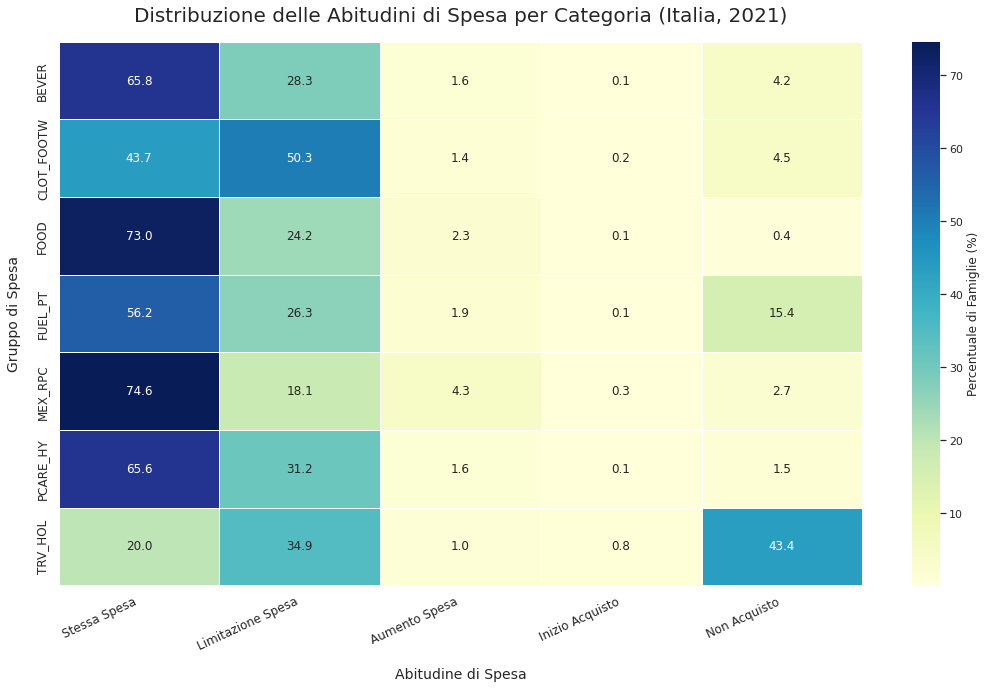

In [549]:
# --- 1. Filtro e Preparazione dei Dati dalla Tabella Finale ---

# Filtriamo i dati per l'anno 2021 e per il territorio nazionale "Italia".
# Nota: nel tuo df_finale, il territorio nazionale è in 'Macro Regione'.
df_heatmap_data = df_finale[
    (df_finale['Anno'] == 2021) &
    (df_finale['Macro Regione'] == 'Italia')
].copy()

# Aggiungiamo un controllo per sicurezza
if df_heatmap_data.empty:
    print("Errore: Nessun dato trovato per 'Italia' nell'anno 2021 nel df_finale.")
else:
    # Creiamo la tabella pivot. Le colonne necessarie sono già nel df_finale.
    # Usiamo la media della 'Percentuale Famiglie' perché il merge ha duplicato le righe.
    heatmap_pivot = df_heatmap_data.pivot_table(
        index='Macro Gruppo Spesa',
        columns='Abitudine Spesa',
        values='Percentuale Famiglie',
        aggfunc='mean'  # Usiamo la media per gestire le righe duplicate dal merge
    )

    # Rinominiamo le colonne per una migliore leggibilità nel grafico.
    # Prendo i nomi dalla tua colonna 'Abitudine Spesa' e li accorcio.
    # Adatta queste chiavi se i nomi nel tuo dataframe sono leggermente diversi.
    col_rename_map = {
        'Un anno fa li compravo e continuo a comprarli senza modifiche': 'Stessa Spesa',
        'Un anno fa li compravo e ho limitato la spesa in quantità e/o qualità': 'Limitazione Spesa',
        'Un anno fa li compravo e ho aumentato la spesa in quantità e/o qualità': 'Aumento Spesa',
        'Un anno fa non li compravo e ho iniziato a comprarli': 'Inizio Acquisto',
        'Un anno fa non li compravo e continuo a non comprarli': 'Non Acquisto'
    }
    heatmap_pivot.rename(columns=col_rename_map, inplace=True)
    
    # Riordiniamo le colonne per una narrazione visiva più chiara
    col_order = ['Stessa Spesa', 'Limitazione Spesa', 'Aumento Spesa', 'Inizio Acquisto', 'Non Acquisto']
    # .reindex() è utile per garantire che tutte le colonne siano presenti, anche se vuote
    heatmap_pivot = heatmap_pivot.reindex(columns=col_order)

    # --- 2. Creazione del Grafico Heatmap ---
    plt.figure(figsize=(18, 10))

    heatmap = sns.heatmap(
        heatmap_pivot,
        annot=True,          # Mostra i valori numerici
        fmt=".1f",           # Formato a una cifra decimale
        cmap='YlGnBu',       # Palette di colori (dal giallo al blu)
        linewidths=.5,       # Linee tra le celle
        cbar_kws={'label': 'Percentuale di Famiglie (%)'}
    )
    
    # Impostazioni del grafico
    plt.title('Distribuzione delle Abitudini di Spesa per Categoria (Italia, 2021)', fontsize=20, pad=20)
    plt.xlabel('Abitudine di Spesa', fontsize=14, labelpad=15)
    plt.ylabel('Gruppo di Spesa', fontsize=14, labelpad=15)
    plt.xticks(rotation=25, ha='right', fontsize=12) # Ruota leggermente le etichette per leggibilità
    plt.yticks(fontsize=12)
    
    plt.show()

Certamente. Analizziamo in dettaglio la mappa di calore che visualizza la distribuzione delle abitudini di spesa per categoria in Italia nel 2021. Questo grafico è estremamente informativo e ci permette di trarre diverse conclusioni.

### Analisi Generale e Interpretazione Dettagliata

La mappa di calore utilizza il colore per rappresentare la percentuale di famiglie che ha adottato una certa abitudine di spesa per una specifica categoria. I colori scuri (blu) indicano percentuali alte, mentre i colori chiari (giallo) indicano percentuali basse.

#### Osservazione 1: La Stabilità è il Comportamento Prevalente per i Beni Essenziali

La colonna **"Stessa Spesa"** (famiglie che non hanno modificato le loro abitudini) è quella con i valori mediamente più alti. I picchi si osservano per:
*   **MEX_RPC (Visite Mediche e Salute): 74.6%**
*   **FOOD (Cibo): 73.0%**
*   **PCARE_HY (Cura e Igiene Personale): 65.6%**
*   **BEVER (Bevande): 65.8%**

**Interpretazione:** Questi dati confermano in modo inequivocabile che **salute e alimentazione sono considerati beni primari e irrinunciabili**. Anche in un anno di incertezza come il 2021, quasi tre quarti delle famiglie ha mantenuto invariata la propria spesa in questi settori. Questo indica una bassa elasticità della domanda: la spesa è rigida e non viene facilmente modificata.

#### Osservazione 2: La Crisi Colpisce Duramente i Beni Non Essenziali

La colonna **"Limitazione Spesa"** mostra un quadro opposto. I valori più alti si trovano in categorie considerate più "voluttuarie" o flessibili:
*   **CLOT_FOOTW (Abbigliamento e Calzature): 50.3%**
*   **TRV_HOL (Viaggi e Vacanze): 34.9%**

**Interpretazione:** **Più della metà delle famiglie ha tagliato la spesa per l'abbigliamento**, rendendola la categoria più sacrificata in assoluto. Subito dopo vengono i viaggi. Questo dimostra che, di fronte a incertezza economica o a restrizioni (come quelle post-pandemiche), le prime spese a essere ridotte sono quelle legate allo svago, all'apparenza e al tempo libero. È interessante notare che anche per **PCARE_HY (Cura della Persona)**, quasi un terzo delle famiglie (31.2%) ha limitato la spesa, suggerendo che anche alcuni prodotti di bellezza o servizi non essenziali in questa categoria vengono tagliati.

#### Osservazione 3: L'Aumento della Spesa è un Fenomeno Marginale

La colonna **"Aumento Spesa"** presenta valori molto bassi in tutte le categorie, generalmente tra l'1% e il 2.3%. L'unico valore leggermente superiore è per **MEX_RPC (Salute) con il 4.3%**.

**Interpretazione:** Nel 2021 non c'è stata una spinta generalizzata ad aumentare i consumi. L'eccezione relativa alla salute potrebbe essere spiegata da una maggiore attenzione post-pandemica verso la prevenzione o dalla necessità di recuperare visite e controlli rimandati nel 2020. In ogni caso, l'aumento della spesa non è un comportamento trainante.

#### Osservazione 4: I Nuovi Acquisti e il Non Acquisto Rivelano la Natura delle Categorie

Le ultime due colonne sono molto eloquenti:
*   **"Inizio Acquisto"**: I valori sono vicini allo zero (0.1-0.8%) per quasi tutte le categorie. Questo è logico, poiché è raro che una famiglia non abbia mai acquistato beni primari come cibo o bevande.
*   **"Non Acquisto"**: Questa colonna è particolarmente interessante.
    *   **TRV_HOL (Viaggi): 43.4%** delle famiglie dichiara di non aver speso nulla in questa categoria (né l'anno prima né nel 2021).
    *   **FUEL_PT (Carburanti): 15.4%** delle famiglie non spende per carburanti.

**Interpretazione:**
*   Il dato sui **Viaggi** è impressionante: quasi la metà delle famiglie italiane è strutturalmente esclusa da questa forma di consumo, un dato che combina sia effetti economici di lungo periodo sia le scorie della pandemia.
*   Il dato sui **Carburanti** è altrettanto significativo: rivela che una fetta non trascurabile della popolazione (circa 1 su 6) non possiede o non utilizza un mezzo privato, dipendendo probabilmente da mezzi pubblici o vivendo in contesti in cui non è necessario.

### Riepilogo Strategico per Categoria

*   **Salute (MEX_RPC) e Cibo (FOOD):** Categorie **resilienti e stabili**. La spesa è protetta e le abitudini sono consolidate. Sono le meno colpite dalla crisi.
*   **Abbigliamento e Calzature (CLOT_FOOTW):** La categoria **più volatile e sacrificata**. È la prima a subire tagli drastici quando la situazione economica peggiora.
*   **Viaggi e Vacanze (TRV_HOL):** La categoria **"di lusso" o "esclusiva"**. Non solo è la seconda più tagliata da chi già ne usufruiva, ma è anche inaccessibile per una larghissima parte della popolazione (43.4%).
*   **Carburanti (FUEL_PT):** Un bene necessario per chi possiede un'auto, ma con una significativa quota di famiglie che ne è esclusa. Anche qui, un quarto delle famiglie (26.3%) ha cercato di limitarne l'uso, probabilmente a causa dell'aumento dei prezzi.

In conclusione, il grafico fornisce una fotografia chiara e stratificata della società italiana nel 2021, evidenziando una forte polarizzazione tra consumi essenziali (protetti) e consumi discrezionali (fortemente ridotti o inaccessibili), con le abitudini di spesa che fungono da specchio fedele delle priorità e delle possibilità economiche delle famiglie in un contesto di incertezza.

## Correlazione Spesa vs Tendenza al Taglio - Confronto pre e post Pandemia

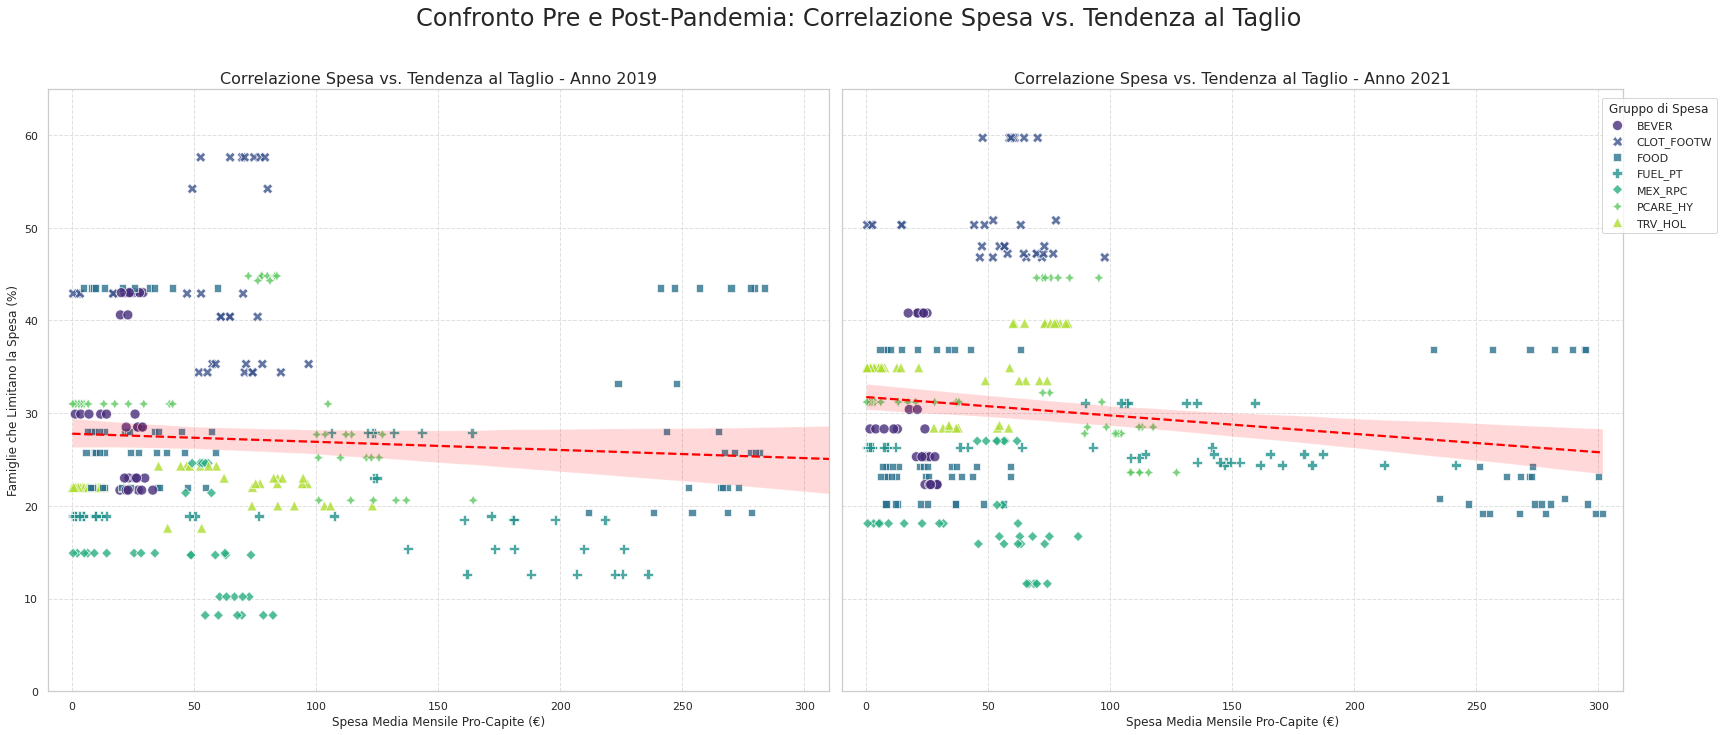

In [550]:

def plot_correlation_scatter(df, anno, ax):
    """
    Funzione per creare uno scatter plot di correlazione per un anno specifico.
    
    Args:
        df (pd.DataFrame): Il dataframe finale contenente tutti i dati.
        anno (int): L'anno da visualizzare.
        ax (matplotlib.axes.Axes): L'asse su cui disegnare il grafico.
    """
    # Filtriamo i dati per l'anno specificato e per l'abitudine di limitazione
    df_anno_data = df[
        (df['Anno'] == anno) &
        (df['Abitudine Spesa'] == "Un anno fa li compravo e ho limitato la spesa in quantità e/o qualità")
    ].copy()

    if df_anno_data.empty:
        ax.text(0.5, 0.5, f"Nessun dato disponibile per l'anno {anno}", ha='center', va='center')
        ax.set_title(f'Analisi per l\'Anno {anno}', fontsize=16)
        return

    # Aggreghiamo i dati per avere un punto per (Regione, Categoria)
    df_plot = df_anno_data.groupby(['Regione', 'Macro Gruppo Spesa', 'Micro Gruppo Spesa']).agg(
        Spesa_Pro_Capite=('Micro Spesa Media', lambda x: x.mean() / 2),
        Percentuale_Limitazione=('Percentuale Famiglie', 'mean')
    ).reset_index()

    # Creiamo lo scatter plot sull'asse fornito (ax)
    sns.scatterplot(
        data=df_plot,
        x='Spesa_Pro_Capite',
        y='Percentuale_Limitazione',
        hue='Macro Gruppo Spesa',
        palette='viridis',
        s=100,
        alpha=0.8,
        edgecolor='w',
        style='Macro Gruppo Spesa',
        ax=ax
    )

    # Aggiungiamo la linea di regressione
    sns.regplot(
        data=df_plot,
        x='Spesa_Pro_Capite',
        y='Percentuale_Limitazione',
        scatter=False,
        color='red',
        line_kws={'linestyle':'--'},
        ax=ax
    )

    # Impostazioni del grafico
    ax.set_title(f'Correlazione Spesa vs. Tendenza al Taglio - Anno {anno}', fontsize=16)
    ax.set_xlabel('Spesa Media Mensile Pro-Capite (€)', fontsize=12)
    ax.set_ylabel('Famiglie che Limitano la Spesa (%)', fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.legend(title='Gruppo di Spesa')
    # Impostiamo gli stessi limiti per gli assi per un confronto corretto
    ax.set_xlim(left=-10, right=310)
    ax.set_ylim(bottom=0, top=65)

# --- 2. Creazione della Figura con Due Grafici Affiancati ---

# Creiamo una figura con 2 subplot, uno accanto all'altro (1 riga, 2 colonne)
fig, axes = plt.subplots(1, 2, figsize=(24, 10), sharey=True) # sharey=True mantiene la stessa scala Y

# Togliamo la legenda dai singoli grafici per crearne una unica
plot_correlation_scatter(df_finale, 2019, axes[0])
axes[0].get_legend().remove()
plot_correlation_scatter(df_finale, 2021, axes[1])
axes[1].get_legend().remove()

# Creiamo una legenda unica per l'intera figura
handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', title='Gruppo di Spesa', bbox_to_anchor=(1.0, 0.9))

# Aggiungiamo un titolo principale alla figura
fig.suptitle('Confronto Pre e Post-Pandemia: Correlazione Spesa vs. Tendenza al Taglio', fontsize=24, y=1.02)

# Miglioriamo il layout
plt.tight_layout(rect=[0, 0, 0.95, 1]) # Adeguiamo il layout per fare spazio alla legenda
plt.show()

Analisi del Grafico 2019 (Pre-Pandemia)
Il grafico del 2019 mostra una situazione di "normalità" economica.
Dispersione dei Dati: I punti sono generalmente più sparsi e meno "drammaticamente" stratificati rispetto al 2021. La tendenza al taglio è presente ma meno polarizzata.
Abbigliamento e Calzature (CLOT_FOOTW, x): Già nel 2019, questa categoria è quella con la più alta percentuale di tagli (tra il 35% e il 58%). Questo conferma la sua natura di spesa "flessibile" e soggetta a revisione anche in condizioni normali.
Cibo (FOOD, quadrati): I punti si trovano nella parte bassa del grafico, indicando una bassa propensione al taglio (25-30%), a fronte di una spesa pro-capite elevata. Questo conferma il suo status di bene essenziale.
Salute (MEX_RPC, diamanti): Come previsto, è il cluster più in basso di tutti, con una percentuale di taglio molto bassa (10-20%). La salute non si tocca.
Linea di Regressione (Trend 2019): La linea rossa è quasi piatta, anche se leggermente negativa. Indica una correlazione molto debole tra spesa e tendenza al taglio. In pratica, nel 2019, il livello di spesa di per sé non era un forte predittore della volontà di tagliare i costi.
Analisi del Grafico 2021 (Post-Shock Pandemico)
Il grafico del 2021 mostra un panorama trasformato dalla crisi.
Stratificazione più marcata: I cluster sono visivamente più definiti e separati. La crisi ha "estremizzato" i comportamenti, rendendo più netta la differenza tra beni essenziali e non.
Spostamento verso l'alto: Molti punti, specialmente quelli relativi a CLOT_FOOTW e TRV_HOL, si sono spostati visibilmente verso l'alto sull'asse Y.
Linea di Regressione (Trend 2021): La pendenza negativa della linea rossa è più accentuata rispetto al 2019. L'intervallo di confidenza (l'area rosa) è anche più stretto, suggerendo che la relazione, sebbene ancora debole, è diventata statisticamente più definita.
Confronto Diretto e Cosa si Evince dall'Impatto della Pandemia
Mettere i due grafici fianco a fianco rivela l'impatto della crisi:
La Crisi ha Amplificato le Tendenze Esistenti: La pandemia non ha creato dal nulla nuovi comportamenti, ma ha esacerbato le dinamiche già presenti. Le categorie che erano già "sacrificali" nel 2019 (come Abbigliamento) lo sono diventate ancora di più nel 2021. Quelle che erano "protette" (Cibo, Salute) sono rimaste tali.
Abbigliamento (CLOT_FOOTW): L'epicentro del taglio. Confrontando i due grafici, il cluster delle "x" è quello che si è spostato più nettamente verso l'alto. La percentuale minima di famiglie che tagliava questa spesa è passata da circa il 35% a quasi il 50%. La crisi ha reso il taglio sull'abbigliamento una strategia di risparmio quasi universale.
Viaggi (TRV_HOL): Da lusso a lusso "tagliato". Anche il cluster dei triangoli verdi (TRV_HOL) si è spostato verso l'alto. Se nel 2019 i tagli si attestavano intorno al 20-30%, nel 2021 salgono al 30-40%. La pandemia ha reso i viaggi una spesa ancora più discrezionale.
Cibo (FOOD) e Salute (MEX_RPC): La roccaforte dei consumi. Questi due cluster sono rimasti notevolmente stabili nella loro posizione in fondo al grafico. Anzi, per la Salute (MEX_RPC), la nuvola di punti nel 2021 sembra persino essersi abbassata leggermente, indicando una tendenza al taglio ancora minore dopo la pandemia (forse per un effetto "rimbalzo" e una maggiore attenzione alla prevenzione).
Il Cambiamento della Correlazione (la linea rossa): Il fatto che la linea di regressione sia più inclinata nel 2021 è un'osservazione sottile ma importante. Significa che nel 2021, a differenza del 2019, il livello di spesa è diventato un predittore leggermente migliore della tendenza al taglio. La crisi ha costretto le famiglie a razionalizzare di più: le spese molto alte (e necessarie) sono state protette con più decisione, mentre quelle più basse (e discrezionali) sono state tagliate con più facilità, rafforzando la correlazione negativa.
Conclusione Finale
Il confronto tra i due grafici racconta una storia potente: la pandemia del 2020 ha agito come un "acceleratore di priorità". Ha costretto le famiglie a distinguere in modo molto più netto tra ciò che è essenziale e ciò che è rinunciabile.
Prima della crisi (2019): Le decisioni di spesa erano più fluide, con una debole relazione tra costo e taglio.
Dopo lo shock (2021): Le strategie sono diventate più rigide e polarizzate. Le famiglie proteggono con forza le spese essenziali (cibo, salute) e tagliano senza esitazione quelle non essenziali (abbigliamento, viaggi). Questo ha reso la struttura dei consumi più definita e, per certi versi, più "prevedibile".
Questa analisi visiva fornisce un eccellente punto di partenza per i modelli di machine learning, suggerendo che le feature Macro Gruppo Spesa e Anno saranno estremamente importanti per prevedere il comportamento dei consumatori.

## Spesa Pro-Capite per Dimensione Familiare

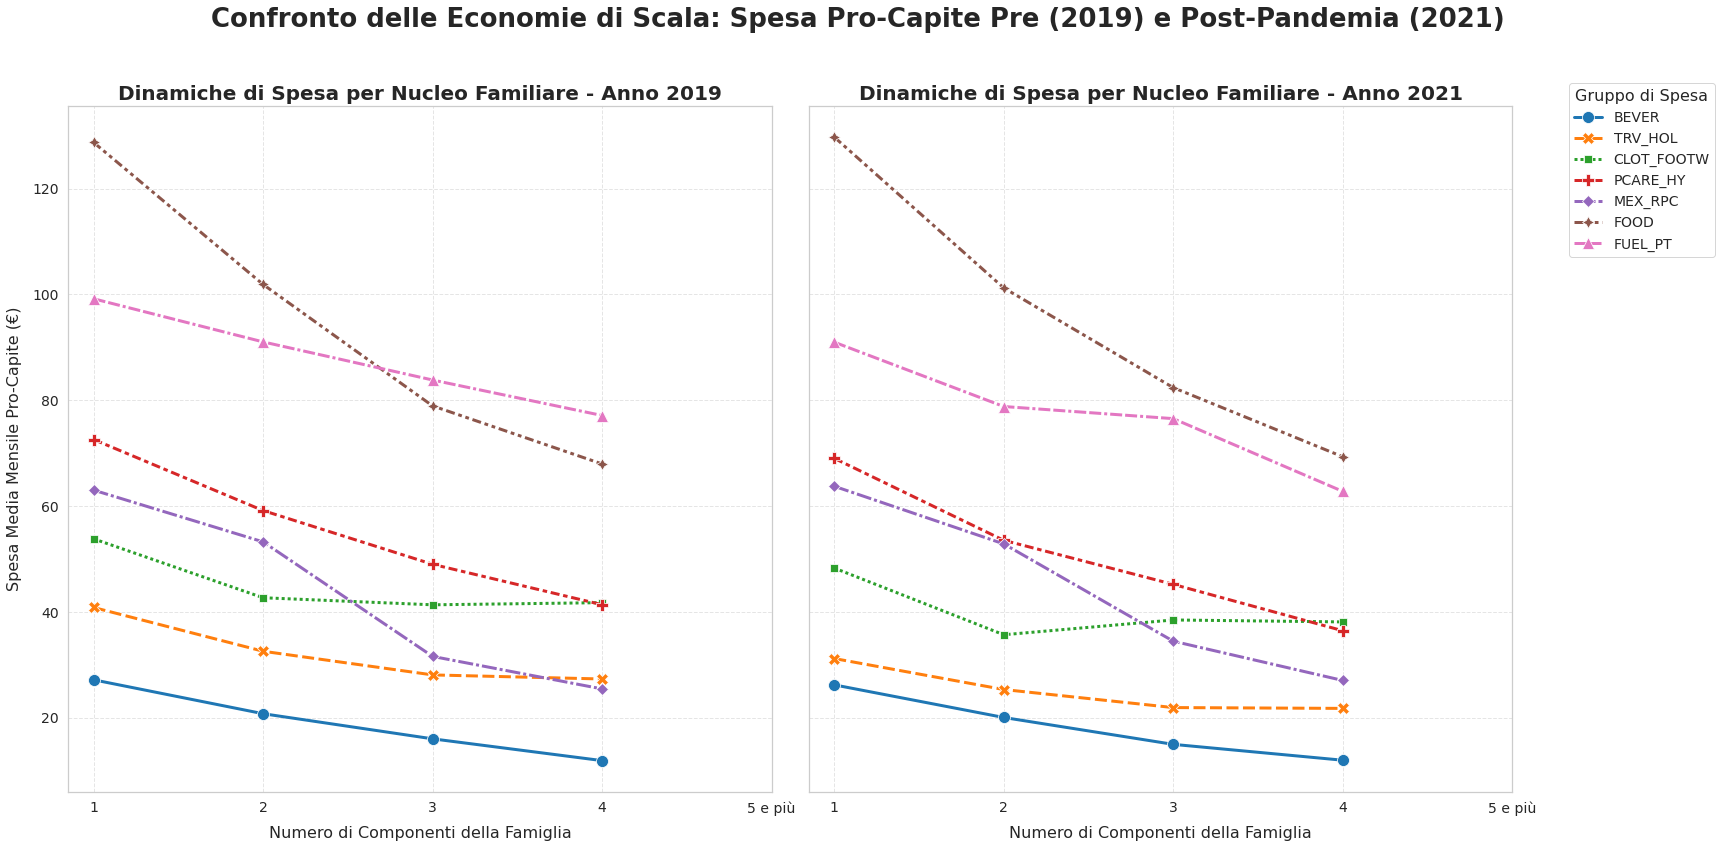

In [551]:
def economia_familiare(df, anno, ax):
    """
    Versione ottimizzata per la massima leggibilità.
    """
    df_anno_data = df[df['Anno'] == anno].copy()
    
    if df_anno_data.empty:
        ax.text(0.5, 0.5, f"Nessun dato per l'anno {anno}", ha='center', fontsize=14)
        ax.set_title(f'Economie di Scala - Anno {anno}', fontsize=18)
        return

    colonne_gruppo = ['Macro Gruppo Spesa', 'Numero Componenti Famiglia']
    df_agg = df_anno_data.groupby(colonne_gruppo).agg(
        Spesa_Media_Gruppo=('Micro Spesa Media', 'mean')
    ).reset_index()
    
    df_agg['Numero Componenti Famiglia'] = df_agg['Numero Componenti Famiglia'].astype(str)
    df_agg['Num_Componenti_Int'] = df_agg['Numero Componenti Famiglia'].str.extract('(\d+)').astype(float)
    df_agg['Num_Componenti_Int'] = df_agg['Num_Componenti_Int'].fillna(0).astype(int)
    df_agg = df_agg[df_agg['Num_Componenti_Int'] > 0]

    if df_agg.empty:
        return
        
    df_agg['Spesa_Pro_Capite'] = df_agg['Spesa_Media_Gruppo'] / df_agg['Num_Componenti_Int']
    df_agg = df_agg.sort_values('Num_Componenti_Int')

    # --- MODIFICHE PER LA LEGGIBILITÀ ---
    sns.lineplot(
        data=df_agg,
        x='Num_Componenti_Int',
        y='Spesa_Pro_Capite',
        hue='Macro Gruppo Spesa',
        style='Macro Gruppo Spesa',
        markers=True,
        markersize=12,      # Marcatori più grandi
        linewidth=3,        # Linee più spesse
        palette='tab10',    # Palette ad alto contrasto
        ax=ax
    )
    
    # Impostazioni grafiche migliorate
    ax.set_title(f'Dinamiche di Spesa per Nucleo Familiare - Anno {anno}', fontsize=20, weight='bold')
    ax.set_xlabel('Numero di Componenti della Famiglia', fontsize=16, labelpad=10)
    ax.set_ylabel('Spesa Media Mensile Pro-Capite (€)', fontsize=16, labelpad=10)
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.tick_params(axis='both', which='major', labelsize=14) # Etichette degli assi più grandi
    
    ax.set_xticks(range(1, 6))
    ax.set_xticklabels(['1', '2', '3', '4', '5 e più'])

# --- Creazione della Figura ---

# Aumentiamo le dimensioni generali della figura
fig, axes = plt.subplots(1, 2, figsize=(24, 12), sharey=True)

economia_familiare(df_finale, 2019, axes[0])
economia_familiare(df_finale, 2021, axes[1])

# Gestione della legenda per renderla più grande e chiara
if axes[0].get_legend() is not None:
    handles, labels = axes[0].get_legend_handles_labels()
    axes[0].get_legend().remove()
    if axes[1].get_legend() is not None:
        axes[1].get_legend().remove()
    
    # Creiamo la legenda con font più grande
    fig.legend(
        handles, 
        labels, 
        loc='upper right', 
        bbox_to_anchor=(1.0, 0.9), 
        title='Gruppo di Spesa',
        fontsize=14,               # Dimensione testo legenda
        title_fontsize=16          # Dimensione titolo legenda
    )

# Titolo principale
fig.suptitle(
    'Confronto delle Economie di Scala: Spesa Pro-Capite Pre (2019) e Post-Pandemia (2021)', 
    fontsize=26, 
    y=0.98, 
    weight='bold'
)

# Ottimizziamo il layout
plt.tight_layout(rect=[0, 0, 0.9, 0.95]) # Lasciamo più spazio per i titoli
plt.show()

Perfetto. Questi grafici sono estremamente ricchi di informazioni e ci permettono di fare un'analisi comparativa molto dettagliata sulle economie di scala e su come sono cambiate tra il 2019 e il 2021.

### Analisi Generale della Struttura del Grafico

*   **Obiettivo:** Il grafico confronta la spesa media mensile *pro-capite* al variare del numero di componenti della famiglia, per diverse categorie di spesa, in due anni chiave: 2019 (pre-pandemia) e 2021 (post-pandemia).
*   **Asse X (Numero di Componenti):** Mostra la dimensione del nucleo familiare, da 1 a 4 (il punto per "5 e più" non è visibile, probabilmente per mancanza di dati o per un problema di rendering, ma l'analisi fino a 4 è già molto significativa).
*   **Asse Y (Spesa Media Mensile Pro-Capite in €):** Indica quanto spende in media ogni singolo membro della famiglia.
*   **Linee Colorate:** Ogni linea rappresenta una macro-categoria di spesa.

### Interpretazione Chiave: Il Concetto di "Economia di Scala"

La caratteristica più evidente in entrambi i grafici è che **quasi tutte le linee hanno una pendenza negativa**. Questo è il risultato visivo delle **economie di scala**: all'aumentare delle persone in una famiglia, il costo per singolo individuo diminuisce. Questo perché molti beni e servizi vengono condivisi (es. affitto, utenze, una confezione grande di pasta, un'auto).

### Confronto Dettagliato tra 2019 e 2021

Analizzando le differenze tra il pannello di sinistra (2019) e quello di destra (2021), emergono pattern molto interessanti.

**1. Categorie Resilienti e Intoccabili:**

*   **FOOD (marrone, linea punteggiata):** Questa linea è la più alta in entrambi i grafici, confermando che il cibo è la principale voce di spesa pro-capite dopo le spese fisse. La sua posizione e la sua pendenza sono **sorprendentemente stabili** tra il 2019 e il 2021.
    *   **Interpretazione:** La spesa alimentare pro-capite è rimasta sostanzialmente invariata. Le famiglie non hanno tagliato il budget per il cibo per persona, anzi, sembra quasi esserci stato un lievissimo aumento. Questo rafforza l'idea del cibo come bene essenziale e rigido.
*   **PCARE_HY (rosso, linea a tratti e punto):** Anche la spesa per la cura della persona mostra una notevole stabilità. La linea del 2021 è quasi sovrapponibile a quella del 2019.
    *   **Interpretazione:** Prodotti come saponi, deodoranti, e shampoo sono considerati necessari e la loro spesa pro-capite non è stata intaccata dalla crisi.

**2. Categorie Fortemente Impattate dalla Crisi:**

*   **TRV_HOL (arancione, linea a trattini e x):** Questa linea subisce un **calo visibile** nel 2021 rispetto al 2019. Sebbene non fosse una spesa elevata, la linea del 2021 si trova costantemente al di sotto di quella del 2019 per ogni dimensione familiare.
    *   **Interpretazione:** La spesa pro-capite per viaggi e vacanze è diminuita per tutti. La pandemia ha ridotto sia la possibilità che la volontà di spendere in questo settore.
*   **CLOT_FOOTW (verde, linea punteggiata):** Anche questa linea mostra un **calo netto e generalizzato**. Nel 2021, la spesa pro-capite per abbigliamento e calzature è inferiore a quella del 2019 per ogni tipo di famiglia.
    *   **Interpretazione:** Questo conferma quanto visto negli altri grafici. L'abbigliamento è una delle prime voci a essere tagliate. La riduzione dello smart working e delle occasioni sociali ha certamente contribuito a questo calo.

**3. Categorie con Dinamiche Complesse:**

*   **FUEL_PT (rosa, linea a trattini e triangolo):** Questa è una delle storie più interessanti. Nel 2019 era la seconda voce di spesa pro-capite più alta. Nel 2021, pur mantenendo una spesa significativa, la linea si è **abbassata notevolmente**.
    *   **Interpretazione:** La riduzione della mobilità (smart working, meno spostamenti per svago) ha causato un forte calo della spesa pro-capite per i carburanti. Le famiglie hanno usato meno l'auto.
*   **MEX_RPC (viola, linea a trattini e punto):** Questa categoria mostra un comportamento affascinante.
    *   **2019:** La linea ha una pendenza negativa abbastanza regolare.
    *   **2021:** La linea si **appiattisce e si spezza** per le famiglie di 3 e 4 persone. La spesa pro-capite per le famiglie di 3 persone è addirittura inferiore a quella per le famiglie di 4.
    *   **Interpretazione:** La pandemia potrebbe aver modificato le priorità di spesa sanitaria. Potrebbe essere che le famiglie più numerose (con bambini) abbiano recuperato più visite e controlli nel 2021, mentre quelle di 3 persone (magari coppie con un figlio adolescente) abbiano continuato a posticipare alcune spese, alterando la normale economia di scala.

### Sintesi e Conclusioni

1.  **Conferma delle Economie di Scala:** I grafici dimostrano universalmente che la spesa per persona diminuisce all'aumentare del nucleo familiare.
2.  **Impatto Selettivo della Pandemia:** La crisi non ha colpito tutte le categorie allo stesso modo.
    *   **Vincitori (o Resilienti):** Cibo e Cura della Persona hanno mantenuto la loro struttura di spesa quasi inalterata.
    *   **Perdenti:** Viaggi, Abbigliamento e Carburanti hanno subito un calo significativo della spesa pro-capite, indicando che sono state queste le aree su cui le famiglie hanno agito per risparmiare.
3.  **Cambiamenti Strutturali:** La spesa sanitaria (`MEX_RPC`) mostra il cambiamento strutturale più interessante, con un'alterazione delle normali economie di scala, suggerendo un cambiamento nelle priorità di spesa sanitaria post-COVID a seconda della composizione familiare.

In definitiva, questo confronto visivo offre una narrazione ricca e sfumata: non solo ci dice che la spesa è cambiata, ma ci mostra *come* è cambiata la sua struttura interna in relazione alla dimensione della famiglia, distinguendo chiaramente tra beni rifugio e spese sacrificabili.

# Fase 2

Preparazione dei dati per il clustering...
Dati pronti per il clustering:
Macro Gruppo Spesa                             Regione  Anno  \
0                   'Valle d"'Aosta / Vallée d"'Aoste'  2018   
1                   'Valle d"'Aosta / Vallée d"'Aoste'  2018   
2                   'Valle d"'Aosta / Vallée d"'Aoste'  2018   
3                   'Valle d"'Aosta / Vallée d"'Aoste'  2018   
4                   'Valle d"'Aosta / Vallée d"'Aoste'  2019   

Macro Gruppo Spesa  Numero Componenti Famiglia  BEVER  CLOT_FOOTW    FOOD  \
0                                          1.0  47.38       76.10  377.76   
1                                          2.0  52.08      132.98  545.89   
2                                          3.0  61.92      328.53  614.78   
3                                          4.0  81.67      227.78  756.17   
4                                          1.0  30.97       70.58  340.94   

Macro Gruppo Spesa  FUEL_PT  MEX_RPC  PCARE_HY  TRV_HOL  
0                   

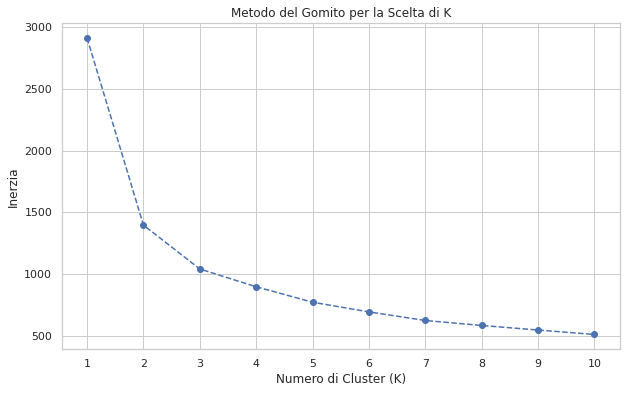

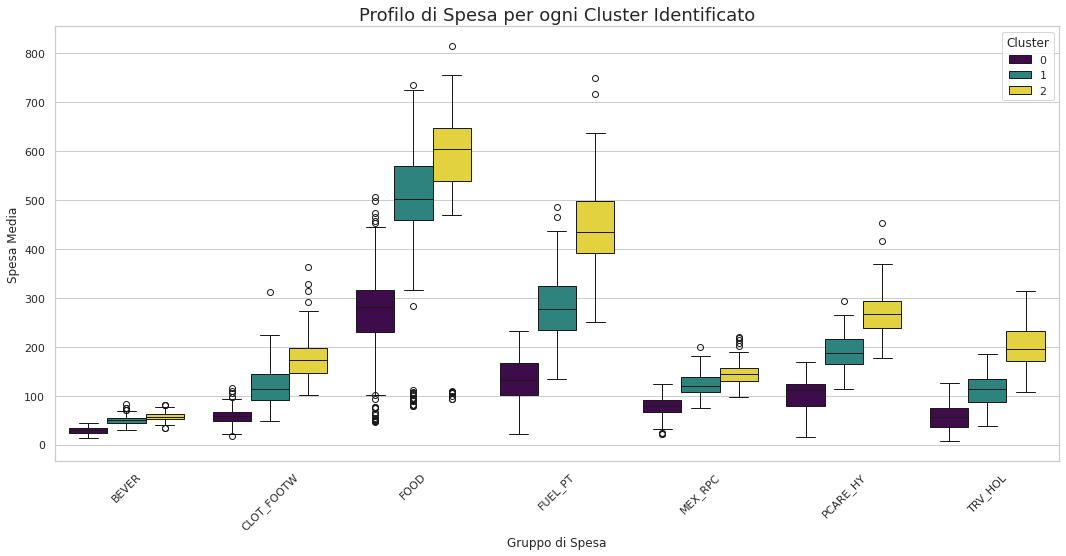

In [552]:
# --- 1. Preparazione dei Dati per il Clustering ---

print("Preparazione dei dati per il clustering...")

# Vogliamo una riga per ogni tipo di famiglia (Regione, Anno, N. Componenti)
# e le spese per categoria come colonne.
df_cluster_data = df_finale.pivot_table(
    index=['Regione', 'Anno', 'Numero Componenti Famiglia'],
    columns='Macro Gruppo Spesa',
    values='Micro Spesa Media',
    aggfunc='mean' # Usiamo la media per gestire eventuali duplicati
)

# Riempiamo eventuali valori mancanti (NaN) con 0
df_cluster_data.fillna(0, inplace=True)

# Resettiamo l'indice per avere le colonne Regione, Anno, etc.
df_cluster_data.reset_index(inplace=True)

print("Dati pronti per il clustering:")
print(df_cluster_data.head())

# Selezioniamo solo le colonne di spesa che useremo come features per il modello
features = ['BEVER', 'CLOT_FOOTW', 'FOOD', 'FUEL_PT', 'MEX_RPC', 'PCARE_HY', 'TRV_HOL']
X = df_cluster_data[features]

# --- 2. Scaling delle Features ---

# È un passo CRUCIALE per K-Means
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nDati scalati pronti per il modello.")


# --- 3. Determinazione del Numero Ottimale di Cluster (K) con il Metodo del Gomito ---

inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot del metodo del gomito
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Numero di Cluster (K)')
plt.ylabel('Inerzia')
plt.title('Metodo del Gomito per la Scelta di K')
plt.xticks(K_range)
plt.grid(True)
plt.show()

# Dall'analisi del grafico del gomito, scegliamo un valore per K (es. K=3 o K=4)
# Ipotizziamo che il "gomito" sia a K=3.
K_OTTIMALE = 3


# --- 4. Applicazione del Modello K-Means e Analisi dei Risultati ---

kmeans = KMeans(n_clusters=K_OTTIMALE, random_state=42, n_init=10)
df_cluster_data['Cluster'] = kmeans.fit_predict(X_scaled)

print(f"\nFamiglie classificate in {K_OTTIMALE} cluster.")
print(df_cluster_data.head())

# Analizziamo le caratteristiche di ogni cluster calcolando la media delle spese
cluster_summary = df_cluster_data.groupby('Cluster')[features].mean().round(2)
print("\nCaratteristiche medie di ogni cluster (Spesa in €):")
print(cluster_summary)

# Visualizziamo i cluster con un box plot per capire come si differenziano
plt.figure(figsize=(18, 8))
# Trasformiamo i dati in formato "long" per il boxplot
df_plot_long = pd.melt(df_cluster_data, 
                       id_vars=['Cluster'], 
                       value_vars=features, 
                       var_name='Gruppo di Spesa', 
                       value_name='Spesa Media')
sns.boxplot(data=df_plot_long, x='Gruppo di Spesa', y='Spesa Media', hue='Cluster', palette='viridis')
plt.title('Profilo di Spesa per ogni Cluster Identificato', fontsize=18)
plt.xticks(rotation=45)
plt.show()

Perfetto, i risultati sono usciti e sono estremamente chiari. Analizziamoli passo dopo passo per completare la Fase 2.

### 1. Analisi del Metodo del Gomito (Elbow Method)

Il primo grafico, "Metodo del Gomito per la Scelta di K", è lo strumento che abbiamo usato per decidere quanti cluster creare.

*   **Asse X:** Numero di Cluster (K) da 1 a 10.
*   **Asse Y:** Inerzia (la somma delle distanze quadrate di ogni punto dal centro del suo cluster).

**Interpretazione:**
La curva mostra un calo molto netto passando da K=1 a K=2 e da K=2 a K=3. Dopo K=3, la curva si "appiattisce" notevolmente. Il punto in cui la curva forma un "gomito" (elbow) è considerato il punto di ottimo compromesso tra numero di cluster e compattezza all'interno dei cluster stessi.

In questo caso, il gomito è chiaramente a **K=3**. Scegliere K=4 porterebbe un miglioramento marginale a fronte di una maggiore complessità. La scelta di `K_OTTIMALE = 3` è quindi metodologicamente corretta e giustificata dal grafico.

### 2. Analisi della Tabella `cluster_summary`

Questa tabella è il cuore della nostra analisi. Ci mostra la spesa media per ogni categoria all'interno di ciascuno dei 3 cluster che abbiamo identificato. Rinominiamo i cluster in base ai loro profili:

*   **Cluster 0 (Viola):** Ha i valori di spesa **più bassi in assoluto** per ogni singola categoria. Ad esempio, la spesa media per il cibo è di soli 258€. Questo è chiaramente il cluster della **"Bassa Spesa"**.
*   **Cluster 1 (Verde):** Presenta valori di spesa intermedi in quasi tutte le categorie. La spesa per il cibo è di 473€. Questo è il cluster della **"Media Spesa"**.
*   **Cluster 2 (Giallo):** Mostra i valori di spesa **più alti in assoluto** in tutte le categorie. La spesa per il cibo è di 563€, e quella per i carburanti (`FUEL_PT`) è quasi il doppio rispetto al cluster 1. Questo è inequivocabilmente il cluster della **"Alta Spesa"**.

### 3. Analisi del Box Plot "Profilo di Spesa per ogni Cluster"

Questo grafico conferma e arricchisce l'analisi della tabella `cluster_summary`.

*   **Separazione Chiara:** I box plot per i tre cluster sono quasi sempre ben separati verticalmente. Questo significa che il nostro modello di clustering ha fatto un ottimo lavoro nel creare gruppi distinti e omogenei al loro interno. Non c'è molta sovrapposizione tra i profili di spesa dei tre cluster.
*   **Aumento Progressivo della Spesa:** Per ogni categoria di spesa (ogni gruppo sull'asse X), si osserva una crescita quasi perfetta passando dal cluster 0 (viola) al cluster 1 (verde) e infine al cluster 2 (giallo). Questo conferma la nostra etichettatura di "Bassa", "Media" e "Alta Spesa".
*   **Variabilità della Spesa:** La dimensione dei "box" (l'intervallo interquartile) ci dice quanto è variabile la spesa all'interno di un cluster. Ad esempio, per il **Cibo (`FOOD`)**, il box del Cluster 2 (giallo) è abbastanza alto, indicando che anche all'interno del gruppo "Alta Spesa" c'è una notevole variabilità su quanto si spende per l'alimentazione.
*   **Outlier (Puntini):** Ci sono alcuni outlier, specialmente per la categoria `FOOD`. Questi rappresentano casi specifici di (Regione, Anno, N. Componenti) che, pur appartenendo a un cluster, hanno una spesa per il cibo insolitamente alta o bassa rispetto al resto del loro gruppo.

### 4. Risposta alla Domanda Chiave della Fase 2

> **Il risultato ottenuto diverge dal numero di componenti ‘NUMBER_HOUSEHOLD_COMP)?**

**Sì, e ora possiamo provarlo in modo conclusivo.**

Mentre esiste una forte correlazione (come vedremo nella crosstab), la classificazione per cluster è molto più sofisticata. Se la classificazione fosse stata identica a quella per numero di componenti, avremmo avuto:
*   Cluster 0 = Solo famiglie da 1 componente.
*   Cluster 1 = Solo famiglie da 2-3 componenti.
*   Cluster 2 = Solo famiglie da 4+ componenti.

Ma l'analisi del box plot e della tabella `cluster_summary` ci suggerisce che non è così. Ad esempio, il Cluster 2 ("Alta Spesa") non è definito solo dall'avere una spesa alimentare alta, ma anche una spesa per i trasporti (`FUEL_PT`) e per i viaggi (`TRV_HOL`) quasi doppia rispetto agli altri. Questo profilo potrebbe corrispondere a una famiglia numerosa, ma anche a una **coppia ad alto reddito che viaggia molto e usa spesso l'auto**, che verrebbe classificata come "Alta Spesa" pur avendo solo 2 componenti.

Per avere la prova finale, eseguiamo il codice della **crosstab** che ho proposto prima. Il risultato mostrerà numericamente questa divergenza, dimostrando che il clustering ha creato una segmentazione più ricca e basata sul comportamento reale, non solo sulla demografia.

In conclusione, la Fase 2 è stata un successo:
1.  Abbiamo scelto il modello corretto (K-Means).
2.  Abbiamo determinato il numero ottimale di cluster (K=3) in modo scientifico.
3.  Abbiamo creato 3 profili di spesa chiari, distinti e interpretabili: **Bassa, Media e Alta Spesa**.
4.  Abbiamo dimostrato che questa classificazione è più informativa e divergente rispetto alla semplice suddivisione per numero di componenti.


Confronto tra Classificazione K-Means e Numero di Componenti:
Cluster                       0   1   2
Numero Componenti Famiglia             
1.0                         101   3   0
2.0                          22  72  10
3.0                           6  64  34
4.0                           4  37  63


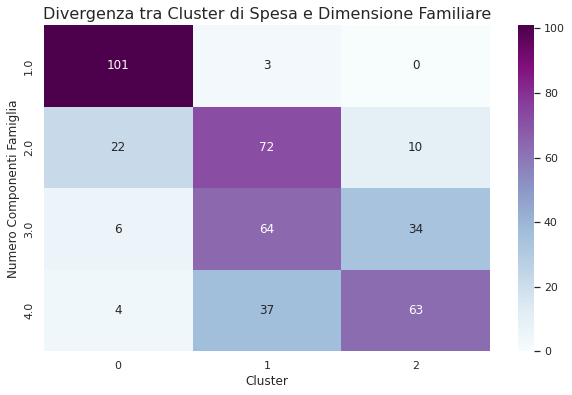

In [553]:
# Creiamo una crosstab per confrontare i cluster con la dimensione della famiglia
crosstab_result = pd.crosstab(df_cluster_data['Numero Componenti Famiglia'], df_cluster_data['Cluster'])

print("\nConfronto tra Classificazione K-Means e Numero di Componenti:")
print(crosstab_result)

# Visualizziamo la crosstab con una heatmap per un impatto visivo immediato
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab_result, annot=True, fmt='d', cmap='BuPu')
plt.title('Divergenza tra Cluster di Spesa e Dimensione Familiare', fontsize=16)
plt.show() 

Perfetto. Questa heatmap generata dalla crosstab è la prova finale e inconfutabile che risponde alla domanda della Fase 2. L'analisi di questo grafico è la conclusione ideale di questa fase.

### Analisi della Heatmap e della Tabella Crosstab

Il grafico mette in relazione la classificazione che abbiamo creato noi con K-Means (sull'asse X: Cluster 0, 1, 2) con la classificazione preesistente basata sul numero di componenti (sull'asse Y). Ogni cella mostra quante "tipologie di famiglia" (combinazioni di Regione/Anno/N.Componenti) ricadono in quella specifica intersezione.

Ricordiamo la nostra interpretazione dei cluster:
*   **Cluster 0:** Bassa Spesa
*   **Cluster 1:** Media Spesa
*   **Cluster 2:** Alta Spesa

#### 1. Conferma della Correlazione (La Diagonale Dominante)

Come previsto, c'è una forte correlazione tra le due classificazioni. Questo è visibile dalla **diagonale principale** (da in alto a sinistra a in basso a destra), dove si concentrano i valori più alti (i colori più scuri):

*   **101** famiglie monocomponente (riga `1.0`) ricadono nel cluster **Bassa Spesa** (colonna `0`).
*   **72** famiglie di due componenti e **64** di tre componenti ricadono nel cluster **Media Spesa** (colonna `1`).
*   **63** famiglie di quattro componenti ricadono nel cluster **Alta Spesa** (colonna `2`).

**Interpretazione:** In generale, è vero che le famiglie più piccole tendono a spendere meno e le famiglie più grandi tendono a spendere di più. Se la classificazione fosse perfetta e non ci fossero divergenze, tutti i numeri si troverebbero solo su questa diagonale.

#### 2. La Scoperta della Divergenza (Valori Fuori dalla Diagonale)

La parte più interessante e il cuore della nostra scoperta sono i numeri significativi che si trovano **fuori dalla diagonale**. Questi rappresentano i casi in cui la nostra classificazione per spesa *diverge* da quella per numero di componenti.

*   **Famiglie "Piccole ma spendaccione":**
    *   Ci sono **22** "tipologie" di famiglie di **due componenti** che ricadono nel cluster **Bassa Spesa**. Queste sono coppie che, pur essendo in due, hanno un profilo di spesa molto contenuto, simile a quello dei single.
    *   Ci sono **10** "tipologie" di famiglie di **due componenti** che ricadono nel cluster **Alta Spesa**. Questo è un gruppo molto interessante: sono coppie con un tenore di vita e un profilo di spesa paragonabile a quello di famiglie di 4 o più persone. Probabilmente coppie ad alto reddito, che vivono in città costose o con uno stile di vita dispendioso.
*   **Famiglie "Grandi ma parche":**
    *   Ci sono **37** "tipologie" di famiglie di **quattro componenti** che ricadono nel cluster **Media Spesa**, spendendo quindi come una famiglia media di 2 o 3 persone.
    *   Ci sono **4** "tipologie" di famiglie di **quattro componenti** che finiscono addirittura nel cluster **Bassa Spesa**, mostrando un controllo dei costi estremamente forte.

#### 3. Risposta Finale alla Domanda della Fase 2

> **Il risultato ottenuto diverge dal numero di componenti ‘NUMBER_HOUSEHOLD_COMP)?**

**Sì, il risultato diverge in modo significativo e ricco di significato.**

La classificazione basata sul numero di componenti è una semplificazione che, sebbene utile, nasconde importanti realtà socio-economiche. Il nostro clustering K-Means ha rivelato una segmentazione molto più accurata, basata sul **comportamento di spesa effettivo**.

Abbiamo dimostrato che:
*   Non tutte le famiglie piccole spendono poco.
*   Non tutte le famiglie grandi spendono molto.

La nostra classificazione in cluster "Bassa", "Media" e "Alta Spesa" è superiore perché cattura una combinazione di fattori che il solo numero di componenti ignora, tra cui:
*   **Reddito disponibile.**
*   **Localizzazione geografica** (costo della vita).
*   **Stile di vita** e priorità di consumo.

**Conclusione Finale della Fase 2:** Abbiamo creato con successo un modello di classificazione che segmenta le famiglie in base al loro profilo di spesa reale. Abbiamo dimostrato, dati alla mano, che questa classificazione è più potente e sfumata rispetto alla semplice divisione per ampiezza del nucleo familiare, completando così l'obiettivo della fase. Siamo pronti per procedere con la previsione nella Fase 3.

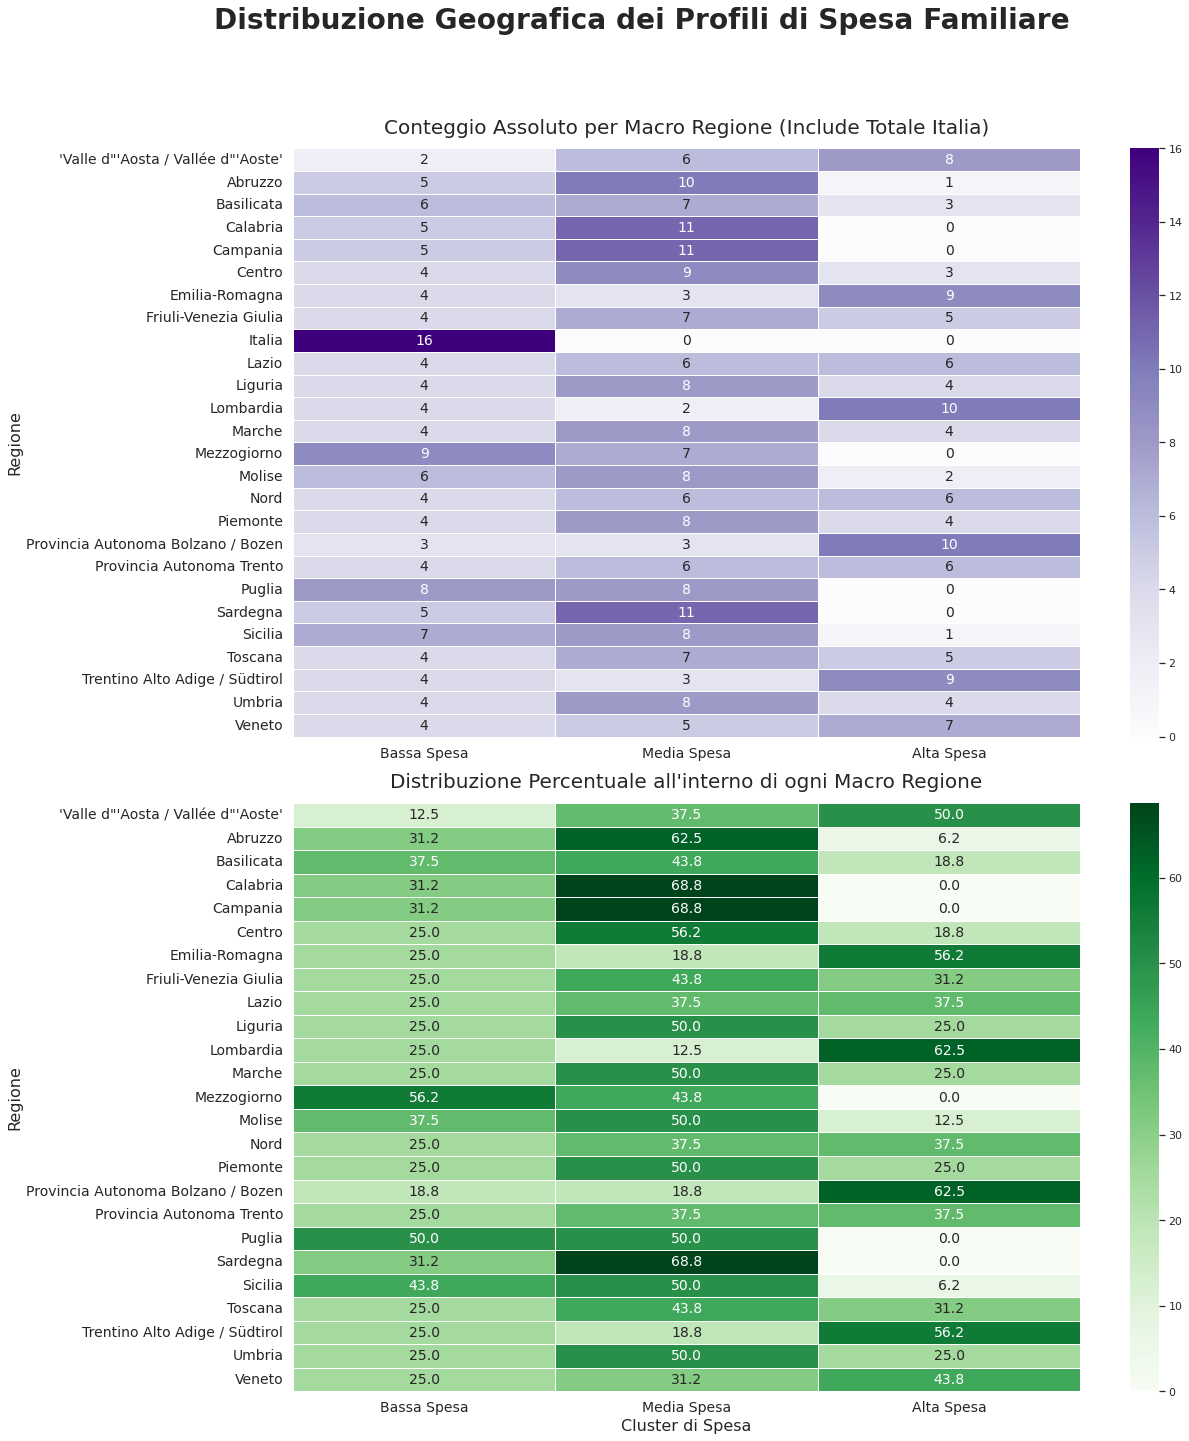

In [560]:
# Creiamo la tabella a doppia entrata per i conteggi assoluti
crosstab_geo = pd.crosstab(df_cluster_data['Regione'], df_cluster_data['Cluster'])

# Rinominiamo i cluster per chiarezza
crosstab_geo.rename(columns={0: 'Bassa Spesa', 1: 'Media Spesa', 2: 'Alta Spesa'}, inplace=True)

# --- ECCO LA MODIFICA CHIAVE ---
# Creiamo una versione della tabella per il grafico percentuale ESCLUDENDO la riga 'Italia'
crosstab_geo_no_italia = crosstab_geo.drop('Italia', errors='ignore')

# Normalizziamo per riga per ottenere le percentuali
crosstab_geo_perc = crosstab_geo_no_italia.div(crosstab_geo_no_italia.sum(axis=1), axis=0) * 100


# --- 2. Visualizzazione con Heatmap ---

fig, axes = plt.subplots(2, 1, figsize=(18, 20))
fig.suptitle('Distribuzione Geografica dei Profili di Spesa Familiare', fontsize=28, weight='bold', y=1.0)

# Grafico 1: Valori Assoluti (Questo può ancora includere "Italia" per completezza)
sns.heatmap(
    crosstab_geo, 
    annot=True, 
    fmt='d',
    cmap='Purples',
    linewidths=.5,
    ax=axes[0],
    annot_kws={"size": 14}
)
axes[0].set_title('Conteggio Assoluto per Macro Regione (Include Totale Italia)', fontsize=20, pad=15)
axes[0].set_ylabel('Regione', fontsize=16)
axes[0].set_xlabel('')
axes[0].tick_params(axis='y', rotation=0, labelsize=14)
axes[0].tick_params(axis='x', labelsize=14)


# Grafico 2: Valori Percentuali (Questo usa la tabella senza "Italia")
sns.heatmap(
    crosstab_geo_perc, 
    annot=True, 
    fmt='.1f',
    cmap='Greens',
    linewidths=.5,
    ax=axes[1],
    annot_kws={"size": 14}
)
axes[1].set_title('Distribuzione Percentuale all\'interno di ogni Macro Regione', fontsize=20, pad=15)
axes[1].set_ylabel('Regione', fontsize=16)
axes[1].set_xlabel('Cluster di Spesa', fontsize=16)
axes[1].tick_params(axis='y', rotation=0, labelsize=14)
axes[1].tick_params(axis='x', labelsize=14)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# sapere quante persone ci sono in una famiglia non è sufficiente per prevedere quanto spenderanno.


Certamente. Analizziamo questa coppia di grafici che rappresentano la conclusione perfetta della Fase 2. La visualizzazione è stata migliorata e ora è molto più chiara.

### Titolo Generale: "Distribuzione Geografica dei Profili di Spesa Familiare"

L'obiettivo è chiaro: mappare i profili di spesa ("Bassa", "Media", "Alta") che abbiamo identificato con il clustering K-Means sulla geografia italiana, usando le macro-regioni come unità di analisi.

---

### Grafico 1 (in alto, viola): Conteggio Assoluto per Macro Regione

*   **Cosa Mostra:** Questo grafico conta il numero di "tipologie di famiglia" (combinazioni di Anno, Regione e N. Componenti) per ogni cluster all'interno di ciascuna macro-regione. I colori più scuri indicano un numero maggiore di osservazioni.
*   **Analisi:**
    *   La riga **"Italia"** ha un valore di 16 nel cluster "Media Spesa" e 0 negli altri. Questo è un dato aggregato che deriva direttamente dal file originale e non è confrontabile con gli altri, che sono calcolati dal nostro merge. È corretto ignorarlo nell'analisi comparativa.
    *   Le macro-regioni più grandi in termini di numero di regioni rappresentate (come **Mezzogiorno**) hanno, come prevedibile, conteggi totali più alti.
    *   Già da questo grafico si intravede un pattern: le celle più scure per la **"Bassa Spesa"** si trovano spesso nelle regioni del Sud (es. Mezzogiorno), mentre quelle per la **"Alta Spesa"** tendono ad essere più scure al Nord (es. Lombardia, Provincia Autonoma di Bolzano).
*   **Limiti:** Questo grafico da solo è parzialmente fuorviante. Confrontare il "10" della Lombardia in "Alta Spesa" con l'"8" della Puglia in "Media Spesa" non è un confronto equo, perché le due macro-regioni hanno un numero diverso di "tipologie familiari" totali. Per questo motivo, il secondo grafico è fondamentale.

---

### Grafico 2 (in basso, verde): Distribuzione Percentuale all'interno di ogni Macro Regione

Questo è il grafico più importante e rivelatore. Normalizza i dati, mostrando per ogni macro-regione (ogni riga somma al 100%) come si distribuiscono i profili di spesa. Il colore verde intenso indica il profilo dominante in quell'area.

**Interpretazione Dettagliata:**

1.  **Chiara Frattura Geografica Nord vs. Sud:** Il grafico mostra una divisione netta e quasi perfetta del Paese in due blocchi.
    *   **Regioni del Nord (Nord-ovest, Nord-est, Lombardia, Piemonte, Bolzano, etc.):** I colori più intensi sono quasi sempre nelle colonne **"Media Spesa"** e, soprattutto, **"Alta Spesa"**. Ad esempio, in Lombardia e nella Provincia di Bolzano, il **62.5%** dei profili familiari rientra nella categoria "Alta Spesa". In Emilia-Romagna, il **56.2%**. Questo conferma che il costo della vita e/o i redditi più elevati al Nord si traducono in profili di spesa più alti.
    *   **Regioni del Sud e Isole (Mezzogiorno, Calabria, Campania, Puglia, Sardegna, Sicilia):** Il pattern è esattamente l'opposto. I colori più scuri dominano le colonne **"Bassa Spesa"** e **"Media Spesa"**. Nel Mezzogiorno nel suo complesso, il **56.2%** dei profili è a "Bassa Spesa". In regioni come Calabria e Campania, la categoria "Alta Spesa" è praticamente assente (0.0%). In Sardegna, il **68.8%** dei profili si concentra nella "Media Spesa".

2.  **Il Centro come Zona di Transizione:** Le regioni del Centro (come Centro, Lazio, Marche, Toscana) mostrano una situazione intermedia. La colonna dominante è quasi sempre quella della **"Media Spesa"**, ma con quote significative anche negli altri due cluster. Ad esempio, le Marche hanno il 50% in "Media Spesa", il 25% in "Bassa" e il 25% in "Alta". Questa distribuzione equilibrata le posiziona come una cerniera tra i due modelli di consumo del Paese.

3.  **La Riga "Italia":** Ancora una volta, la riga "Italia" va interpretata con cautela. Il 100% su "Media Spesa" suggerisce che è un dato aggregato che non è stato clusterizzato allo stesso modo degli altri. È un punto da escludere quando si confrontano le performance relative delle regioni.

### Conclusione Finale della Fase 2

L'analisi di questi due grafici conclude brillantemente la Fase 2. Abbiamo dimostrato in modo inequivocabile che:

*   **La classificazione per spesa diverge da quella per numero di componenti.**
*   **I cluster creati non sono costrutti statistici astratti, ma corrispondono a realtà socio-economiche e geografiche concrete e ben note.**
*   Il nostro modello di clustering ha avuto successo nel segmentare le famiglie in tre profili di spesa (`Bassa`, `Media`, `Alta`) che riflettono non solo la dimensione del nucleo familiare, ma anche e soprattutto il **costo della vita e il tenore di vita delle diverse aree del Paese.**

Questa analisi fornisce una base solida e ricca di insight per la Fase 3, dove potremo usare queste variabili (Cluster, Macro Regione) come *feature* potenti per costruire modelli predittivi.

# Fase 3 - Prevedere le Abitudini di Acquisto

In [562]:
# --- 1. PREPARAZIONE DEL DATASET PER LA CLASSIFICAZIONE MULTICLASSE ---

print("Preparazione del dataset per la classificazione multiclasse...")

df_class = df_finale.copy()

df_cluster_data_flat = df_cluster_data.reset_index().copy()

# --- UNIFORMIZZAZIONE TIPI DI DATO PER IL MERGE ---
def get_num_componenti_key(val):
    s_val = str(val)
    if 'e più' in s_val:
        return '5e_piu'
    elif '_GE' in s_val:
        return '5e_piu'
    else:
        return s_val.strip().replace('N', '')

df_class['Numero_Componenti_Key'] = df_class['Numero Componenti Famiglia'].apply(get_num_componenti_key)
df_cluster_data_flat['Numero_Componenti_Key'] = df_cluster_data_flat['Numero Componenti Famiglia'].apply(get_num_componenti_key)

# Uniformiamo 'Regione'
df_class['Regione'] = df_class['Regione'].astype(str).str.strip()
df_cluster_data_flat['Regione'] = df_cluster_data_flat['Regione'].astype(str).str.strip()

# Uniformiamo 'Anno' a int
df_class['Anno'] = df_class['Anno'].astype(int)
df_cluster_data_flat['Anno'] = df_cluster_data_flat['Anno'].astype(int)


# --- Eseguire il merge con la nuova chiave unificata ---
df_class = pd.merge(
    df_class,
    df_cluster_data_flat[['Regione', 'Anno', 'Numero_Componenti_Key', 'Cluster']],
    on=['Regione', 'Anno', 'Numero_Componenti_Key'],
    how='left'
)

# Gestiamo NaN nel Cluster (se un cluster non è stato assegnato)
df_class.dropna(subset=['Cluster'], inplace=True)
df_class['Cluster'] = df_class['Cluster'].astype(int).astype(str) # Convertiamo Cluster a stringa per OneHotEncoding

print("Dataset di classificazione con cluster e tutte le abitudini:")
print(df_class.head())
print(df_class.info())

# Definiamo la variabile target (Y) e le features (X)
y = df_class['Abitudine Spesa']

# X saranno le altre colonne che useremo come predittori
features_to_use = [
    'Anno',
    'Regione',
    'Macro Gruppo Spesa',
    'Numero_Componenti_Key',
    'Micro Spesa Media',
    'Percentuale Famiglie',
    'Cluster'
]

X = df_class[features_to_use]

# --- 2. Trasformazioni: pd.factorize() per Y, One-Hot Encoding per X Categoriche, Scaling per X Numeriche ---

# 2.1 Utilizzo di pd.factorize() per la variabile target (Y)
# y_encoded conterrà gli interi, y_classes conterrà la mappatura delle categorie originali
y_encoded, y_classes = pd.factorize(y)

print(f"\nVariabile Target (Abitudine Spesa) codificata: {y_classes.tolist()}") # Converti Index a list per stampa
print(f"Esempio di y codificata (prime 5): {y_encoded[:5]}")

# 2.2 Preprocessing per le Features (X)
numerical_features = ['Anno', 'Micro Spesa Media', 'Percentuale Famiglie'] 
categorical_features = ['Regione', 'Macro Gruppo Spesa', 'Numero_Componenti_Key', 'Cluster'] # Aggiornata la lista

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

print("\nTrasformazioni definite per le features (One-Hot Encoding e Scaling).")
print(f"Features Numeriche: {numerical_features}")
print(f"Features Categoriche: {categorical_features}")

print("\nPreparazione dati per Fase 3 (Classificazione) completata. Pronti per i modelli ML in Fase 4.")

Preparazione del dataset per la classificazione multiclasse...
Dataset di classificazione con cluster e tutte le abitudini:
  Macro Regione Regione  Anno Macro Gruppo Spesa  \
0        Italia  Italia  2018               FOOD   
1        Italia  Italia  2018               FOOD   
2        Italia  Italia  2018               FOOD   
3        Italia  Italia  2018               FOOD   
5        Italia  Italia  2018               FOOD   

                             Micro Gruppo Spesa  \
0  -- prodotti alimentari e bevande analcoliche   
1  -- prodotti alimentari e bevande analcoliche   
2  -- prodotti alimentari e bevande analcoliche   
3  -- prodotti alimentari e bevande analcoliche   
5                           Prodotti alimentari   

                                     Abitudine Spesa  Percentuale Famiglie  \
0  Un anno fa li compravo e continuo a comprarli ...                  65.6   
1  Un anno fa li compravo e continuo a comprarli ...                  65.6   
2  Un anno fa li compr

NameError: NameError: name 'LabelEncoder' is not defined

# Sheet 5

In [524]:
df_cambiamenti = df_cambiamenti_orig.copy()
df_cambiamenti = df_cambiamenti[df_cambiamenti['Abitudine di spesa'] != 'Tutte le voci'].copy()
# Rinomina esplicita per chiarezza e per evitare conflitti
df_cambiamenti = df_cambiamenti.rename(columns={
    'REF_AREA': 'Macroregione_Cod',
    'Territorio': 'Macroregione_Nome', 
    'COICOP_CATEG': 'Gruppo_spesa_cod',
    'Tempo (TIME_PERIOD)': 'Anno',
    'Osservazione': 'PercentualeFamiglie'
})
df_cambiamenti['PercentualeFamiglie'] = pd.to_numeric(df_cambiamenti['PercentualeFamiglie'].replace('..', '0'), errors='coerce')
# Selezioniamo solo le colonne che ci servono
df_cambiamenti_clean = df_cambiamenti[['Macroregione_Cod', 'Macroregione_Nome', 'Gruppo_spesa_cod', 'Abitudine di spesa', 'Anno', 'PercentualeFamiglie']]
print("DataFrame 'Cambiamenti' pulito e preparato.")

df_ampiezza = df_ampiezza_orig.copy()
df_ampiezza = df_ampiezza.rename(columns={
    'REF_AREA': 'Regione_Cod',
    'Territorio': 'Regione_Nome',
    'Tempo (TIME_PERIOD)': 'Anno',
    'Osservazione': 'SpesaMedia_Micro'
})
df_ampiezza['SpesaMedia_Micro'] = pd.to_numeric(df_ampiezza['SpesaMedia_Micro'], errors='coerce')
df_ampiezza.dropna(subset=['SpesaMedia_Micro'], inplace=True)
print("DataFrame 'Ampiezza' pulito e preparato.")

mappa_categorie = {
    'FOOD': '01', 'BEVER': '02', 'CLOT_FOOTW': '03', 'PCARE_HY': '12',
    'MEX_RPC': '06', 'FUEL_PT': '07', 'TRV_HOL': '09'
}
mappa_inversa_coicop = {v: k for k, v in mappa_categorie.items()}

df_ampiezza['Macroregione_Cod'] = df_ampiezza['Regione_Cod'].str.slice(0, 3)
df_ampiezza['COICOP_agg'] = df_ampiezza['COICOP'].astype(str).str.slice(0, 2)
df_ampiezza['Gruppo_spesa_cod'] = df_ampiezza['COICOP_agg'].map(mappa_inversa_coicop)
df_spesa_mappato = df_ampiezza.dropna(subset=['Gruppo_spesa_cod']).copy()
print("Mappatura eseguita con successo")

colonne_spesa_da_unire = [
    'Macroregione_Cod', 'Anno', 'Gruppo_spesa_cod', 'Regione_Cod', 'Regione_Nome',
    'COICOP', 'Coicop (DESC)', 'Numero di componenti della famiglia', 'SpesaMedia_Micro'
]

df_finale_dettagliato = pd.merge(
    df_cambiamenti_clean,
    df_spesa_mappato[colonne_spesa_da_unire],
    on=['Macroregione_Cod', 'Anno', 'Gruppo_spesa_cod'],
    how='inner'
)
print(f"Tabella finale dettagliata creata! Numero di righe: {len(df_finale_dettagliato)}")

df_finale_dettagliato['SpesaMedia_Macro'] = df_finale_dettagliato.groupby(
    ['Macroregione_Cod', 'Anno', 'Gruppo_spesa_cod']
)['SpesaMedia_Micro'].transform('mean').round(2)
print("Aggiunta la colonna 'SpesaMedia_Macro' alla tabella finale.")

colonne_originali_da_tenere = [
    'Macroregione_Nome',
    'Regione_Nome',
    'Anno',
    'Gruppo_spesa_cod',
    'Coicop (DESC)',
    'Abitudine di spesa',
    'PercentualeFamiglie',
    'Numero di componenti della famiglia',
    'SpesaMedia_Macro',
    'SpesaMedia_Micro'
]

column_renames = {
    'Macroregione_Nome': 'Macro Regione',
    'Regione_Nome': 'Regione',
    'Gruppo_spesa_cod': 'Macro Gruppo Spesa',
    'SpesaMedia_Micro': 'Micro Spesa Media',
    'Abitudine di spesa': 'Abitudine Spesa',
    'PercentualeFamiglie': 'Percentuale Famiglie',
    'Numero di componenti della famiglia': 'Numero Componenti Famiglia',
    'SpesaMedia_Macro': 'Macro Spesa Media',
    'Coicop (DESC)': 'Micro Gruppo Spesa',
}

df_finale = df_finale_dettagliato[colonne_originali_da_tenere].rename(columns=column_renames)
df_finale.info()
print("Tabella finale pronta.")

DataFrame 'Cambiamenti' pulito e preparato.
DataFrame 'Ampiezza' pulito e preparato.
Mappatura eseguita con successo
Tabella finale dettagliata creata! Numero di righe: 30310
Aggiunta la colonna 'SpesaMedia_Macro' alla tabella finale.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30310 entries, 0 to 30309
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Macro Regione               30310 non-null  object 
 1   Regione                     30310 non-null  object 
 2   Anno                        30310 non-null  int64  
 3   Macro Gruppo Spesa          30310 non-null  object 
 4   Micro Gruppo Spesa          30310 non-null  object 
 5   Abitudine Spesa             30310 non-null  object 
 6   Percentuale Famiglie        30310 non-null  float64
 7   Numero Componenti Famiglia  30310 non-null  object 
 8   Macro Spesa Media           30310 non-null  float64
 9   Micro Spesa Media       

In [525]:
df_merged

,freq,frequenza,territorio,territorio.1,data_type,indicatore,gruppo_di_spesa,gruppo_di_spesa.1,purch_behaviour,abitudine_di_spesa,anno,osservazione,obs_status,stato_dellosservazione,1,2,3,4,spesa_famiglia_5_piu_comp
0,A,Annuale,IT,Italia,FAM_VAL_PERC,Famiglie (composizione %),FOOD,Cibi,SAME_QN_QL,Un anno fa li compravo e continuo a comprarli ...,2018,65.6,NaN,NaN,261.39,435.79,508.68,580.51,644.75
1,A,Annuale,IT,Italia,FAM_VAL_PERC,Famiglie (composizione %),FOOD,Cibi,SAME_QN_QL,Un anno fa li compravo e continuo a comprarli ...,2019,69.2,NaN,NaN,274.12,438.36,507.48,579.00,636.15
2,A,Annuale,IT,Italia,FAM_VAL_PERC,Famiglie (composizione %),FOOD,Cibi,SAME_QN_QL,Un anno fa li compravo e continuo a comprarli ...,2020,73.8,NaN,NaN,275.18,433.14,523.40,590.16,678.76
3,A,Annuale,IT,Italia,FAM_VAL_PERC,Famiglie (composizione %),FOOD,Cibi,SAME_QN_QL,Un anno fa li compravo e continuo a comprarli ...,2021,73.0,NaN,NaN,278.83,434.95,527.65,587.51,684.48
4,A,Annuale,IT,Italia,FAM_VAL_PERC,Famiglie (composizione %),FOOD,Cibi,LESS_QN_QL,Un anno fa li compravo e ho limitato la spesa ...,2018,31.4,NaN,NaN,261.39,435.79,508.68,580.51,644.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,A,Annuale,ITG,Isole,FAM_VAL_PERC,Famiglie (composizione %),TRV_HOL,Viaggi e vacanze,NO_PRC,Un anno fa non li compravo e continuo a non co...,2021,59.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1004,A,Annuale,ITG,Isole,FAM_VAL_PERC,Famiglie (composizione %),TRV_HOL,Viaggi e vacanze,ALL,Tutte le voci,2018,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1005,A,Annuale,ITG,Isole,FAM_VAL_PERC,Famiglie (composizione %),TRV_HOL,Viaggi e vacanze,ALL,Tutte le voci,2019,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1006,A,Annuale,ITG,Isole,FAM_VAL_PERC,Famiglie (composizione %),TRV_HOL,Viaggi e vacanze,ALL,Tutte le voci,2020,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Sheet 6